# **Project Name**- Tata Steel Machine Failure Prediction

##### **Project Type-** Binary Classification
##### **Contribution-** Individual

# **Project Summary-**

In today's world, the industrialization or manufacturing sector is growing rapidly, which helps to ease our working life and helps to reduce hard work with an increase in efficiency. For the functioning of industries, there are many machines required, and it is very important to maintain the efficiency and reliability of Machines to achieve the best production quality and reduce downtime, which is done by predicting the possibility of machine failure. Machine failures are a significant issue in the industrial sector, as they can lead to production disruption, increase maintenance, safety conserns, and various other problems. Consequently, there is a growing need for models and systems that can predict failures in advance.

Like this, there is a leading steel manufacturing industry, which is constantly looking to improve the production process by leveraging the advance data analytics and machine learning techniques. The ability to predict and prevent machine failures is crucial for minimizing production losses, reducing maintenance cost, and ensuring product quality.

This project focuses on building a machine learning solution to predict potential machine failures or breakdowns based on various sensor readings and operational parameters. By leveraging predictive maintenance principles, the goal is to enable proactive interventions, thereby reducing costly downtime, optimizing maintenance schedules, and enhancing overall operational efficiency and safety.

# **GitHub Link-** https://github.com/bpbrijesh/Tata-Steel-Machine-Failure-Prediction-Machine-Learning-Project.git

# **Problem Statement-**

**The aim of this project is to build a machine learning model to predict potential machine failure or breakdown based on various features present in the dataset. The project also includes Efficient Exploratory Data Analysis, proper preparation of data for training, identifying target and feature variables, assigning target features for class imbalance, selecting optimum approaches and algorithms. Among suitable models, select the best model to use, evaluate the results while keeping class imbalance in mind. Concluding the project and denoting the importance of the Project for stakeholders.**


# ***Let's Begin !***

## ***1. Know Data***

###Importing Libraries

In [6]:
!pip install catboost
!pip install optuna

# Libraries to deal with Math and DataFrame
import pandas as pd
import numpy as np
from shapely.geometry import LineString
from scipy.stats import randint, uniform

#Libraries for Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py

# Libraries for Model Training and Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, f1_score, accuracy_score, auc, precision_recall_curve
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe
from catboost import CatBoostClassifier
import lightgbm as lgb
import optuna

# Library to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.9 MB/s eta 0:00:00


### Dataset Loading

####Mounting Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Dataset

In [8]:
ta_train=pd.read_csv('/content/drive/MyDrive/GDFiles/Tata_Train.csv') #Loading Train dataset as ta_train
ta_test=pd.read_csv('/content/drive/MyDrive/GDFiles/Tata_Test.csv') #Loading Test dataset as ta_test

### Dataset First View

In [9]:
ta_train.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [10]:
ta_test.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0  136429     L50896    L                302.3                    311.5   
1  136430     L53866    L                301.7                    311.0   
2  136431     L50498    L                301.3                    310.4   
3  136432     M21232    M                300.1                    309.6   
4  136433     M19751    M                303.4                    312.3   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0                    1499         38.0               60    0    0    0    0   
1                    1713         28.8               17    0    0    0    0   
2                    1525         37.7               96    0    0    0    0   
3                    1479         47.6                5    0    0    0    0   
4                    1515         41.3              114    0    0    0    0   

   RNF  
0    0  
1    0  
2    0  
3    0  
4    0

### Dataset Information

In [11]:
ta_train.info() #Checking the information of Training Set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [12]:
ta_test.info() #Checking information of Testing set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


## ***2. Understanding Variables***

In [13]:
ta_train.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [14]:
ta_test.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

The dataset that we have for this project is collected from various sensors on the machine which represent various operational parameters and failure types of machinery used in steel production. It includes the following key features:

* **ID**: A unique identifying sign to each record
* **Product ID:** Combination of machine type and identifier number
* **Type:** Represents the type of machine, aiding in understanding its operational characteristics, which may be related to machine failure.
Machine type included in this dataset:
  * **L (Low Machine):** These machines are primarily used for lightweight operations or tasks with minimal loads.
  * **M (Medium Machines):** Medium types of machines are versatile and capable of handling various types of tasks or moderate levels of loads.
  * **H (High Machine):** High type machines are designed for heavy duty operations or tasks with substantial loads.

* **Air temperature [K]:** Represents the ambient temperature around the machine, measured in Kelvin (K). Air temperature can be a crucial factor as machines may behave differently in varying ambient temperatures.

* **Process temperature [K]:** Represents the temperature of the process in which the machine is engaged. Certain processes can cause the machine to heat up, which leads to the machine failing.

* **Rotational speed [rpm]:** Indicates the rotational speed at which the machine operates, measured in rotation-per-minutes.
* **Torque[Nm]:** Measures the force that can cause the machine to rotate, measured in Newton meters. Higher torque indicates the higher load on the machine, which increases the possibility of machine failure.
* **Tool wear [Min]:** Represents the cumulative wear on the machine's cutting tool, measured in minutes. High tool wear might indicate the machine is due for maintenance.
* **Machine failure:** A binary indicator specifying whether the machine failed or not.

* **Other Failure modes:** The dataset includes the information about other potential causes of the machine failure. These are also a binary indicator:
  * **TWF (Tool Wear Failure):** Indicate whether machine failed due to tool wear.
  * **HDF (Heat Dissipation Failure):** Indicates whether the machine failed due to inability to dissipate heat.
  * **PWF(Power Failure):** Indicates whether the machine failed due to a Power problem.
  * **OSF (Overstrain Failure):** Indicates whether the machine failed due to being overstrained.
  * **RNF (Random Failure):** Indicates whether the machine failed due to random or unspecified reasons.

### Dataset Unique Values Count

In [15]:
for col in ta_train.columns:     #Checking the number of unique values in the columns of training set
  print(f'{col} has {ta_train[col].nunique()} unique values')

id has 136429 unique values
Product ID has 9976 unique values
Type has 3 unique values
Air temperature [K] has 95 unique values
Process temperature [K] has 81 unique values
Rotational speed [rpm] has 952 unique values
Torque [Nm] has 611 unique values
Tool wear [min] has 246 unique values
Machine failure has 2 unique values
TWF has 2 unique values
HDF has 2 unique values
PWF has 2 unique values
OSF has 2 unique values
RNF has 2 unique values


In [16]:
for colm in ta_test.columns:
  print(f'{colm} has {ta_test[colm].nunique()} unique values')

id has 90954 unique values
Product ID has 9909 unique values
Type has 3 unique values
Air temperature [K] has 92 unique values
Process temperature [K] has 84 unique values
Rotational speed [rpm] has 946 unique values
Torque [Nm] has 595 unique values
Tool wear [min] has 246 unique values
TWF has 2 unique values
HDF has 2 unique values
PWF has 2 unique values
OSF has 2 unique values
RNF has 2 unique values


In [17]:
ta_train.iloc[:,1:8].describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count        136429.000000            136429.000000           136429.000000   
mean            299.862776               309.941070             1520.331110   
std               1.862247                 1.385173              138.736632   
min             295.300000               305.800000             1181.000000   
25%             298.300000               308.700000             1432.000000   
50%             300.000000               310.000000             1493.000000   
75%             301.200000               310.900000             1580.000000   
max             304.400000               313.800000             2886.000000   

         Torque [Nm]  Tool wear [min]  
count  136429.000000    136429.000000  
mean       40.348643       104.408901  
std         8.502229        63.965040  
min         3.800000         0.000000  
25%        34.600000        48.000000  
50%        40.400000       106.000000  
75%        46.100000       159.000000  
max        76.600000       253.000000

In [18]:
ta_test.iloc[:,1:8].describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         90954.000000             90954.000000            90954.000000   
mean            299.859493               309.939375             1520.528179   
std               1.857562                 1.385296              139.970419   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.700000             1432.000000   
50%             300.000000               310.000000             1493.000000   
75%             301.200000               310.900000             1579.000000   
max             304.400000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  90954.000000     90954.000000  
mean      40.335191       104.293962  
std        8.504683        63.871092  
min        3.800000         0.000000  
25%       34.600000        48.000000  
50%       40.500000       106.000000  
75%       46.200000       158.000000  
max       76.600000       253.000000

## ***3. Data Visualization, Storytelling & Experimenting with charts: Understanding the relationships between variables***

#### **Data Distribution based on Machine Type**

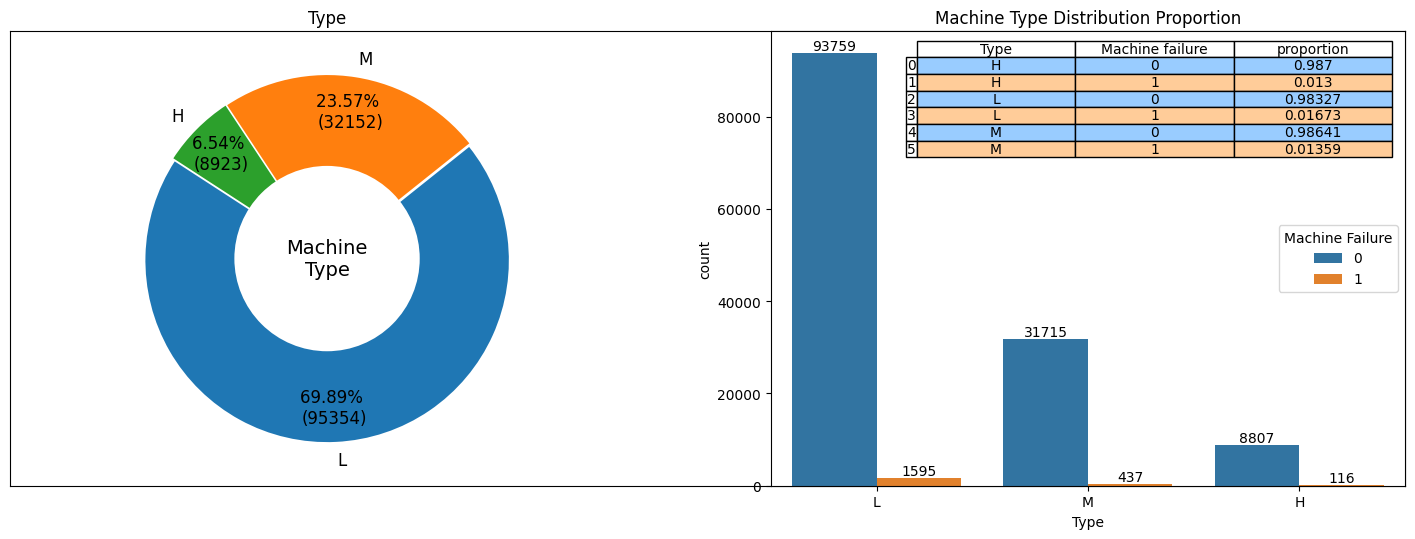

In [19]:
from matplotlib import rcParams
fig=plt.figure(figsize=(18,5.9))
plt.plot()
plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

#Plot Donut Chart for Machine Type
plt.subplot(1,2,1)
value=ta_train['Type'].value_counts()
plt.pie(value, autopct= lambda p: f"{p:.2f}% \n({p*sum(value)/100 :.0f})", pctdistance=0.81, explode=[0.01,0.01,0.01],
        labels=['L','M','H'], textprops={'size':'large', 'fontweight':'medium'}, startangle=147)
c_circle=plt.Circle((0,0), 0.51, fc='white')
fig=plt.gcf()
fig.gca().add_artist(c_circle)
plt.text(0,0,'Machine\nType', fontsize=14, horizontalalignment='center', verticalalignment='center')
plt.title('Type')

#Plot Countplot for Machine Type based on Machine Failure
plt.subplot(1,2,2)
rcParams['font.weight']=521

ax=sns.countplot(data=ta_train, x='Type', hue='Machine failure')
value=ta_train.groupby('Type')['Machine failure'].value_counts()
for count in ax.containers:
  ax.bar_label(count)

plt.legend(loc='center right', title='Machine Failure')

# Plot Proportion for machine type based on machine failure in text format
plt.subplot(1,2,2)
value=pd.DataFrame(ta_train.groupby('Type')['Machine failure'].value_counts(normalize=True).round(5))
the_table=plt.table(cellText=value.reset_index(), loc='upper right', cellColours=[['#99ccff']*3, ['#ffcc99']*3]*3, cellLoc='center', colWidths=[0.25]*6)
plt.title('Machine Type Distribution Proportion')
plt.show()


##### Reason for specific chart

To show the Machine type distribution, I have plotted the Donut plot because of its simplicity and quick overview of data distribution to a broad audience.

To show machine type distribution count by machine failure, I have plotted a count plot in Bar view as it shows a better comparison between Machine running data and Machine failed data of different types of machines. To represent the percentage of the same, I have used a cell Text plot.

Insights From the Chart

* From the above plot, we can say that most of the machines are Low, which contribute about 70% of the total data followed by Medium Machines, which contribute 23.4%, and High Machines which contribute just 6.5%.


* For the case of Machine condition, for Low Machines we have 93759 (98.32)% machine run data and 1595 (1.68)% machine failed data, for Medium Machines we have 31715 (98.64)% machine run just 437 (1.36)% machine failed data and for High Machines there are 8807 (98.7)% machine run data and only 116 (1.3)% machine failed data.

#### **Machine Failure Status and Failure Mode Distribution**

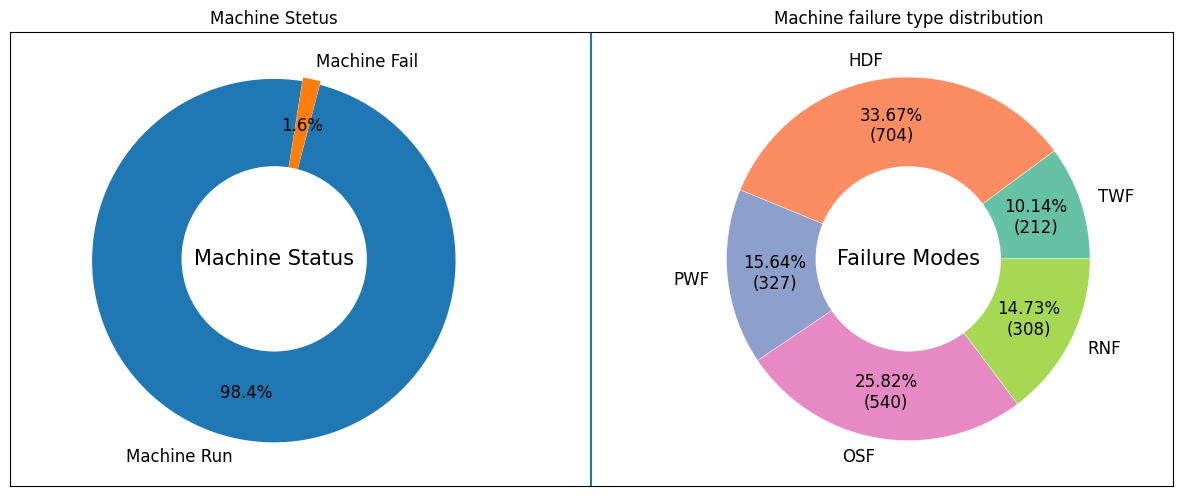

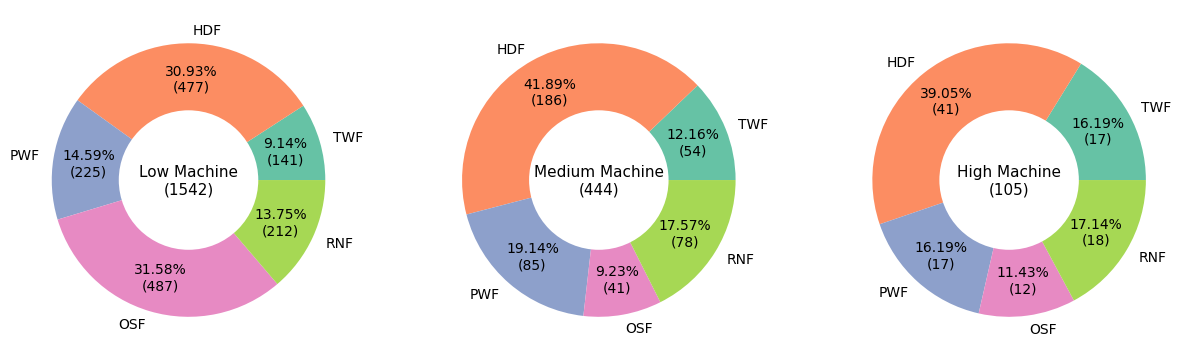

In [20]:
fig=plt.figure(figsize=(15,5.9))
plt.plot()
plt.axvline(x=1)
plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax1=plt.subplot(1,2,1)

#Donut Plot for Machine Stetus (Fail or Run)
plt.pie(ta_train['Machine failure'].value_counts(), autopct=('%1.1f%%'), pctdistance=0.74, explode=[0.01,0.01], labels=['Machine Run','Machine Fail'],startangle=81, textprops={'size':'large', 'fontweight':'medium'})
c_circle=plt.Circle((0,0), 0.51, fc='white')
fig=plt.gcf()
fig.gca().add_artist(c_circle)
plt.text(0,0, 'Machine Status', fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.title('Machine Stetus')

# Plot to represent proportion of different machine failure modes
ax2=plt.subplot(1,2,2)
mode_failure=ta_train[[colm for colm in ta_train.columns if ta_train[colm].nunique()==2]].iloc[:,1:].sum()
plt.pie(mode_failure, autopct= lambda p: f"{p:.2f}%\n({p*sum(mode_failure)/100 :.0f})",pctdistance=0.74, colors=sns.color_palette('Set2'), labels=mode_failure.index,
        wedgeprops={'linewidth':0.27, 'edgecolor':'white'}, textprops={'size':'large', 'fontweight':'medium'})
c_circle1=plt.Circle((0,0), 0.51, fc='white')
fig=plt.gcf()
ax=fig.gca().add_artist(c_circle1)
plt.text(0,0, 'Failure Modes', fontsize=15, horizontalalignment='center', verticalalignment='center')
plt.title('Machine failure type distribution')
Mtype_List=[]

# Plot to represent failure mode proportion of different Machine Types
fig1=plt.figure(figsize=(15,5))
mode_failure1=[]
type_list=['L','M','H']
for i in range(len(type_list)):
  Mtype_List.append(ta_train[ta_train['Type']==type_list[i]].reset_index())
  mode_failure1.append(Mtype_List[i][[colm for colm in Mtype_List[i].columns if Mtype_List[i][colm].nunique()==2]].iloc[:,1:].sum())

  plt.subplot(1,3,i+1)
  plt.pie(mode_failure1[i],autopct= lambda p: f"{p:.2f}%\n({p*sum(mode_failure1[i])/100 :.0f})", textprops={'size':'medium'},colors=sns.color_palette('Set2'), pctdistance=0.74, labels=mode_failure1[i].index)
  c_circle5=plt.Circle((0,0), 0.51, fc='white')
  fig=plt.gcf()
  ax=fig.gca().add_artist(c_circle5)
  plt.text(0,0,f"{'Low Machine' if Mtype_List[i]['Type'][1]=='L' else ('Medium Machine' if Mtype_List[i]['Type'][1]=='M' else 'High Machine')}\n({mode_failure1[i].sum()})",
           fontsize=11, horizontalalignment='center', verticalalignment='center')

plt.show()


##### Reason for specific chart

To show the machine status, Donut chart seems a good option because of its property of representing part of the whole and clear visualization.

To represent different machine failure modes combined, I have plotted donut chart because donut chart looks like one of the best charts as it shows the proportion of categories within a whole, and design flexibility in the central space for label or icon. To represent failure modes of different machine types, I have plotted the same chart.

Insights from the charts

* In this dataset we have 98.4% of such data where the machine runs and just 1.6% of such cases when the machine fails.

* Machine failure includes different potential causes in which HDF (Heat Dissipation Failure) has maximum contribution i.e., over 33% (704) followed by OSF(Overstrain Failure) contributing about 26% (540), PWF(Power Failure) contributes about 16% (327), RNF (Random Failure) contributes about 15% (308) and TWF(Tool Wear Failure) that contributes about 10% (212) for all types of machines.

* For Low Machines, OS Failure and HD Failure have major contributions that is over 60% of the failures are by these two modes only, and the other modes have a lower contribution of about 10% to 15% each.

* For Medium and High Machines, Heat Dissipation Failure has a maximum contribution of about 40% for each type, followed by Power Failure contributing about 19% in Medium and about 16% for High Machines.
Interestingly, Overstrain Failure has a minimum contribution in these two types of machines of about 10% each.

### Function Definetion for further charts

####Describe train and test dataset variables

In [21]:
#Define Function to Describe and print value counts for variables
base_color='#e7f1fe'
def describ(colm):
  fig, ax=plt.subplots(1,5, figsize=(16,2.5), gridspec_kw={'width_ratios':[5,5,1,5,5]})
  axes=ax.flatten()
  fig.subplots_adjust(wspace=0.11)

  # Feature Description
  axes[0].text(0.11, 0.9, ta_train[colm].describe(), va='top', fontsize=9.2, fontfamily='serif', fontweight=511, linespacing=1.21)
  axes[0].set_title('Train_Description')
  axes[0].axis('off')

  axes[1].text(0.11, 0.9, ta_test[colm].describe(), va='top', fontsize=9.2, fontfamily='serif', fontweight=511, linespacing=1.21)
  axes[1].set_title('Test_Description')
  axes[1].axis('off')

  axes[2].plot([1]*14, np.arange(0.1,0.8,0.05), color='k', marker='*', ms=11)
  axes[2].axis('off')

  # Feature Value_counts
  axes[3].text(0.11, 0.9, ta_train[colm].value_counts(normalize=True).head(7).round(5)*100, va='top', fontsize=9.2, fontfamily='serif', fontweight='medium', linespacing=1.21)
  axes[3].set_title('Train Value_counts')
  axes[3].axis('off')

  axes[4].text(0.11, 0.9, ta_test[colm].value_counts(normalize=True).head(7).round(5)*100, va='top', fontsize=9.2, fontfamily='serif', fontweight='medium', linespacing=1.21)
  axes[4].set_title('Test Value_counts')
  axes[4].axis('off')

  rect=plt.Rectangle((0.14,0.11),0.7592,0.77, facecolor=base_color, transform=fig.transFigure, zorder=-1, edgecolor='k')
  fig.patches.append(rect)
  plt.show()

##### Function Description and Chart importance

In this function, I have plotted the train dataset and test dataset statistical summary, and most frequent values side-by-side for clear comparison between values.

For this I have used text plot to get clear insights into values.

####Boxen Plot: For distribution of variable based on Machine failure & Compare Train and Test Dataset

In [22]:
#Combining Train and Test dataset for comparison plot
t_train=ta_train.drop('Machine failure',axis=1).assign(Data='Train')
t_test=ta_test.assign(Data='Test')
compare_data=pd.concat([t_train, t_test])

def boxen(colm):
  plt.figure(figsize=(15,5.9))
  #Boxen plot for Machine condition(Fail or not) based on Machine Type
  plt.subplot(1,2,1)
  sns.boxenplot(data=ta_train, x='Type', y=colm, hue='Machine failure')
  plt.legend(loc=1, title='Machine Failure', facecolor='#e7f1fe', edgecolor='#b2e2ee')
  plt.title(f'Distribution of {colm} on Machine Condition')

  #Boxen plot to Compare Train and Test Dataset based on Machine type
  plt.subplot(1,2,2)
  sns.boxenplot(data=compare_data, x='Type', y=colm, hue='Data')
  plt.legend(loc=1, title='Dataset', facecolor='#e7f1fe')
  plt.title(f'Distribution of {colm} on Dataset')
  plt.show()

##### Function Description and chart importance

In the above function, I have created two charts

Chart-1 Represent the data distribution of specific variables based on machine failure for different machine types.

Chart-2: Represents data distributions of specific variables of the train and test dataset for comparison.

For both the charts, I have plotted the Boxen plot because it represents the shape of data distribution, variability, skewness, and potential outliers, making it useful for comparing data distributions across different groups.


####Histogram Plot: Variable Distribution based on Machine Failure

In [23]:
not_fail=ta_train[ta_train['Machine failure']==0]
fail=ta_train[ta_train['Machine failure']==1]

def histo(column):
  #Histogram plot for Machine Failed
  machine_fail=go.Histogram(x=fail[column],
                    histnorm='percent',
                    name='Machine Fail',
                    marker=dict(line=dict(width=.5, color='brown'), color='#ff5151'),
                    opacity=.9)

  #Histogram plot for Machine Run
  machine_not_fail=go.Histogram(x=not_fail[column],
                        histnorm='percent',
                        name='Machine Run',
                        marker=dict(line=dict(width=.5,color='blue'), color='#2e7eff'),
                        opacity=.9)
  #Plot Layout
  layout=go.Layout(dict(title=column+ ' Frequency Distribution',
                   plot_bgcolor=base_color,
                   paper_bgcolor=base_color,
                   xaxis=dict(gridcolor='#f7f7f7',
                              title=column + ' Values',
                              zerolinewidth=1,
                              ticklen=5,
                              gridwidth=2),
                   yaxis=dict(gridcolor='#f7f7f7',
                              title='Percentage',
                              zerolinewidth=1,
                              ticklen=5,
                              gridwidth=2)))
  data=[machine_fail, machine_not_fail]
  fig=go.Figure(data=data, layout=layout)
  py.iplot(fig)

  #Print Skewness of Machine Run Data
  print(f'Running Data skewness based on {column}: {not_fail[column].skew()}')

  #Print Skewness of Machine Failed Data
  print(f'Failed Data skewness based on {column}: {fail[column].skew()}')

#####Function Information and Chart importance

Above function is defined to plot a Histogram Plot that compares the frequency distribution of specific variables of the train dataset based on machine failure. In this plot, x-axis represents the frequency of data points and y-axis represents the percentage of data points.

I have used Histogram plot because it visualizes the frequency of continuous numerical data by grouping it into bins. Key features include showing data distribution shape, identifying trends, and allowing comparison between different groups that are required for visualization in this plot.

#### **Train: Air Temperature**

#### Describe

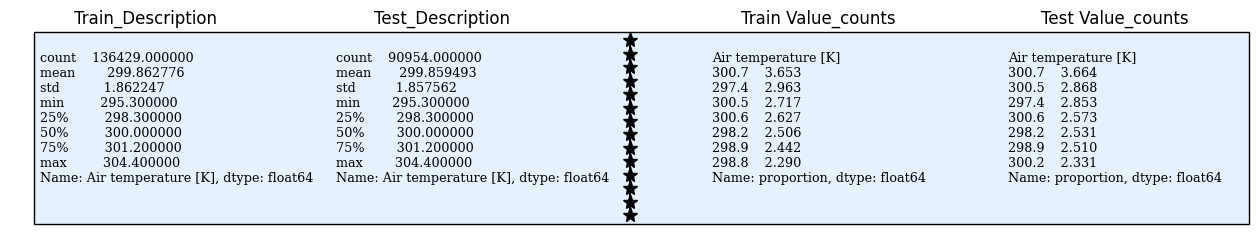

In [24]:
describ('Air temperature [K]') # Describe column Air temperature and value counts

#### Boxen Plot: Destribution of Machine failure & Train Test distribution

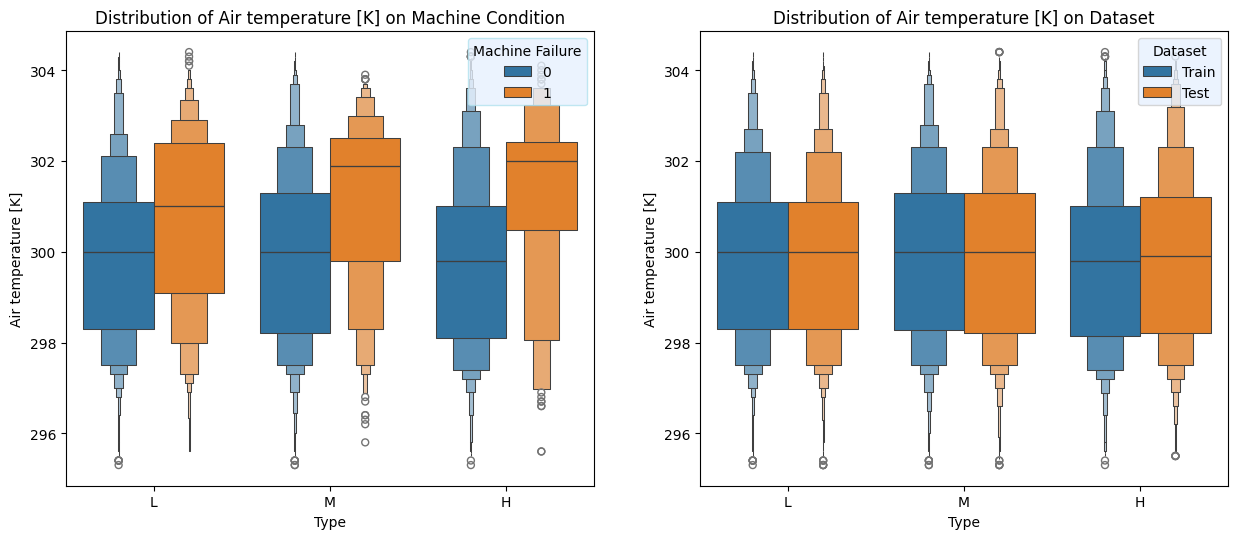

In [25]:
boxen('Air temperature [K]')

####Histogram Plot

In [26]:
histo('Air temperature [K]')  # Histogram plot for Air temperature based on Machine condition.

Running Data skewness based on Air temperature [K]: 0.16975974670062877
Failed Data skewness based on Air temperature [K]: -0.546574992275333


Insights from the plot

* To show the percentage of machines' status over different Air Temperatures, I have used Histogram because Histogram provides a clear understanding of how the data is distributed over different air temperatures.

  * Histogram plot represents that failed data is right skewed with a value of about (-0.55), representing the majority of conditions when the machine failure occurs at higher air temperature.

  * For the machine data in running condition, the data skewness is about (0.169) which indicates that the data is almost uniformly distributed.

* Boxen plot (1) represents the data distribution for machine failure is above that of the machine in running condition for all types of machines, indicating machines are generally failed at higher Air temperature.

* Boxen plot (2) indicates that the boxen plot of Air temperature is  almost identical for each machine type, representing similar data distribution in train and test datasets.


#### **Process Temperature**

####Describe Train and Test

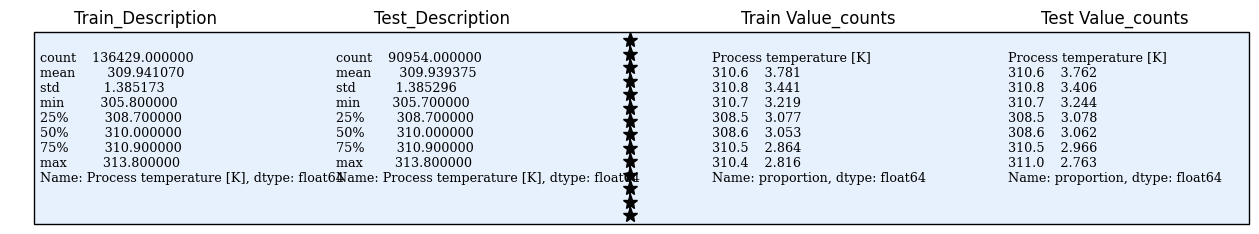

In [27]:
describ('Process temperature [K]')

#### Boxen Plot

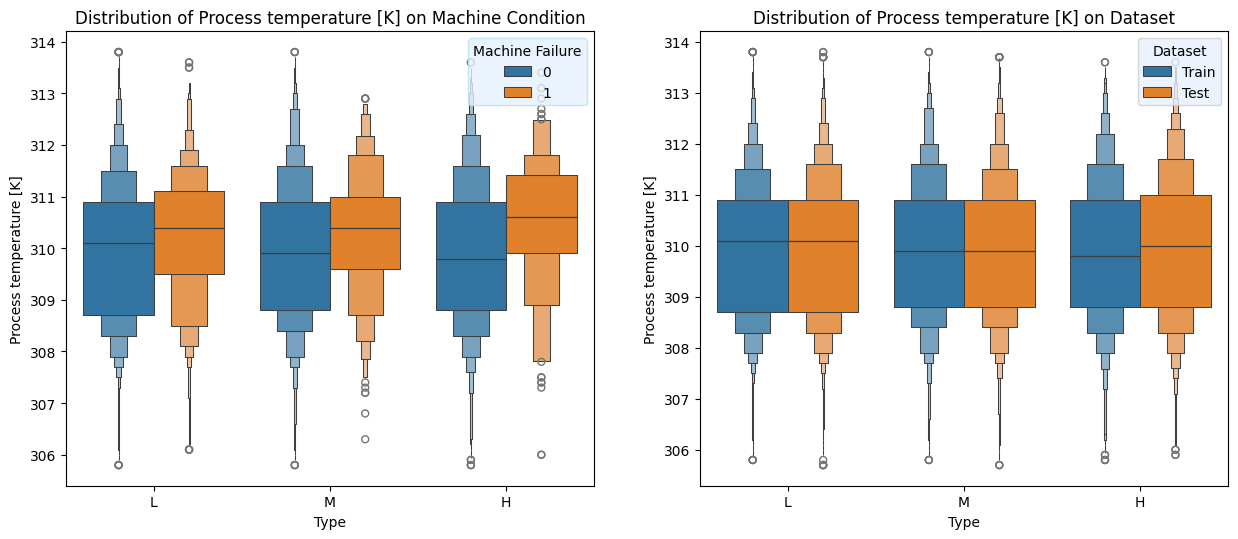

In [28]:
boxen('Process temperature [K]')

####Histogram Plot: Process Temperature frequency distribution on machine failure

In [29]:
histo('Process temperature [K]')

Running Data skewness based on Process temperature [K]: 0.06483650160584949
Failed Data skewness based on Process temperature [K]: -0.43133268231029465


Insights from the plot

* The Histogram plot represents the distribution of (machine failed) data based on Process Temperature.

* The above Histogram plot represents that the distribution of machine failure data is right-skewed with a value of about (-0.43), so we can conclude that the majority of machines failed at higher process temperatures.From the plot we conclude that the majority of the machines failed at process temperatures between 310K and 312K.

  * Skewness of data for machine running condition is (0.064), representing almost 'uniform distribution'.

* Boxen plot (1) represents that the distribution of the majority of data where the machine failed is slightly above the distribution where the machine runs, so similar to air temperature, here the majority of machines fail when the Process temperature was higher.

* Boxen plot (2) represents the distribution of Process Temperature data of the train dataset and the test dataset, which is the same for Low and Medium machines and slightly different for High Machine.


####**Rotational Speed**

####Describe

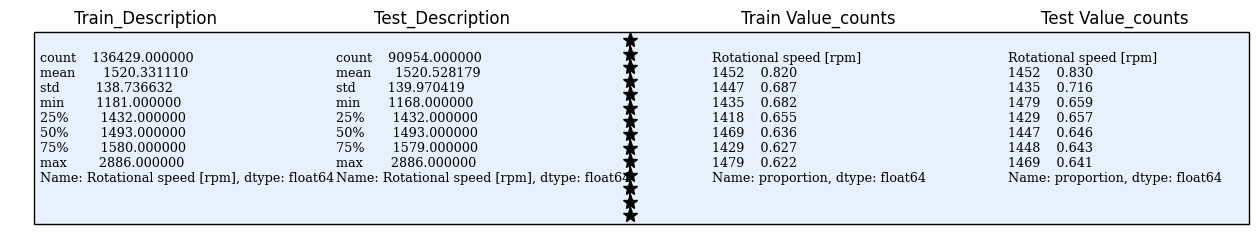

In [30]:
describ('Rotational speed [rpm]')

####Boxen Plot: Distribution based on Machine failure & Train Test Comparison

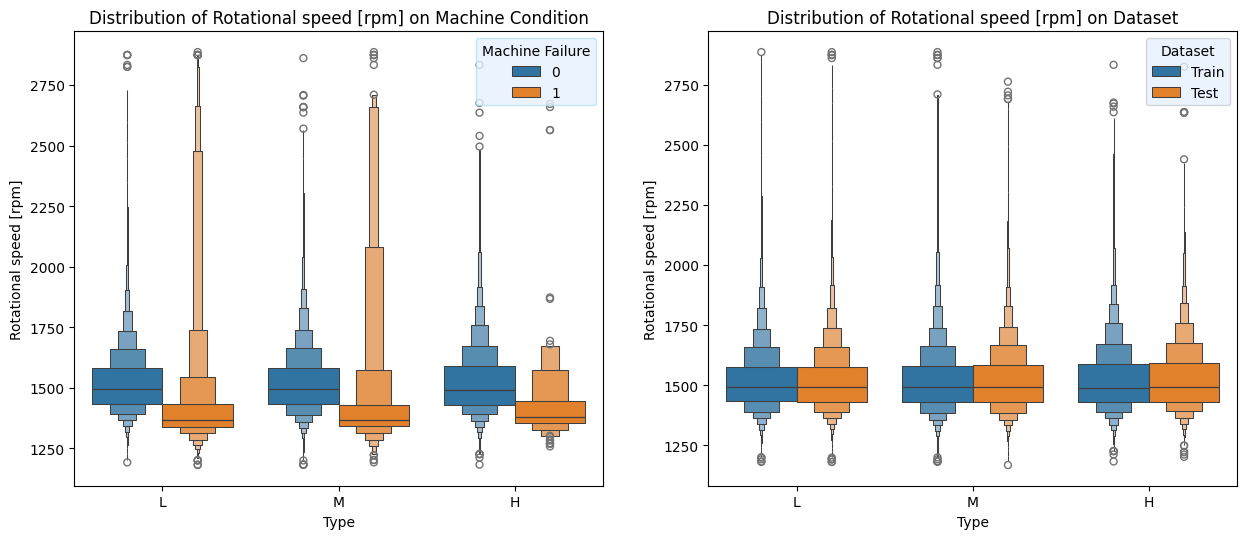

In [31]:
boxen('Rotational speed [rpm]')

####Histogram Plot: Rotational Speed Data Distribution based on machine failure

In [32]:
histo('Rotational speed [rpm]')

Running Data skewness based on Rotational speed [rpm]: 1.653367134979302
Failed Data skewness based on Rotational speed [rpm]: 3.4860521166104097


Insights from the chart

* The above plot shows the distribution of the data, whether the machine failed or not, based on different rotational speeds.

* Histogram plot represents that failed data distribution is left skewed with a value of about (3.48), which indicates that the majority of the machines failed when the ratational speed is comparatively very slow; that is when the speed is between 1200 RPM and 1400 RPM.
Interestingly, we see that some of the data with very high speed also failed.

  * For machine running conditions, here also data is left skewed with value (1.65) which indicates that the majority of data is at lower speed, majorly between 1400 RPM and 1600 RPM.

* From the Boxen Plot (1) we can observe that the median of the distribution of machine failed data is lower than that of machine running data, which indicates that the majority of machines fail when the rotational speed is comparatively slow.

* Boxen plot (2) represents the similar data distribution of Rotational Speed in both train and test datasets of each machine type.

#### **Torque**

####Describe

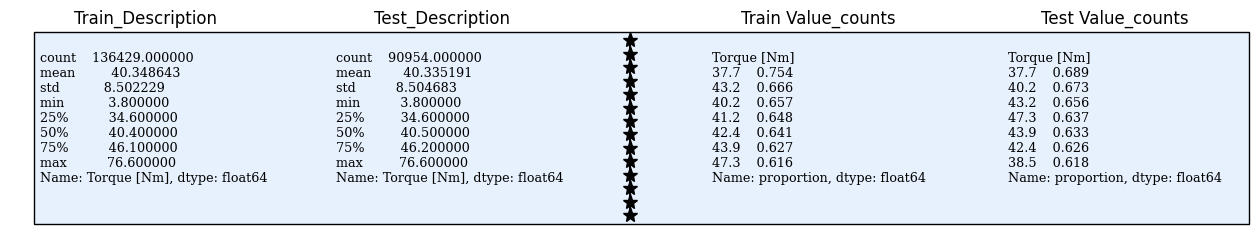

In [33]:
describ('Torque [Nm]')

####Boxen Plot: Machine failure distribution by Machine type & Train Test dataset comparison

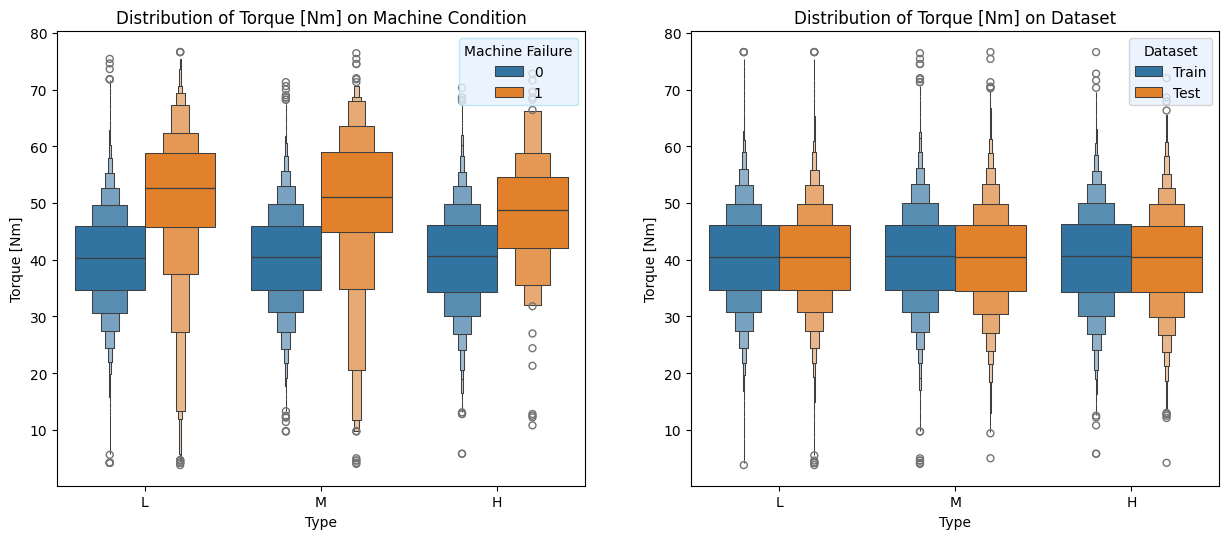

In [34]:
boxen('Torque [Nm]')

####Histogram Plot: Frequency distribution of Torque based on Machine Failure

In [35]:
histo('Torque [Nm]')

Running Data skewness based on Torque [Nm]: -0.06851469852244854
Failed Data skewness based on Torque [Nm]: -1.1812670183923182


Insights from the chart

* Above Histogram plot represents the Torque data distribution based on machine conditions.

  * Histogram plot represents that machine failed data is right skewed with value about (-1.18), representing the majority of machines failing at higher torque (above 45 Nm).

  * Interestingly, the plot represents that almost all conditions when torque is less than 13 Nm the Machine fails.

  * For the machines in running condition the data is normally distributed mainly between 20 Nm and 60 Nm.

* For the case of Boxen plot we can see that the majority of machines fail when the Torque is higher as compared to the machine run for all types of machines.


* Boxen plot (2) represents that the data distribution of the train dataset and the test dataset for each machine type is similar.


#### **Tool Wear**

####Describe

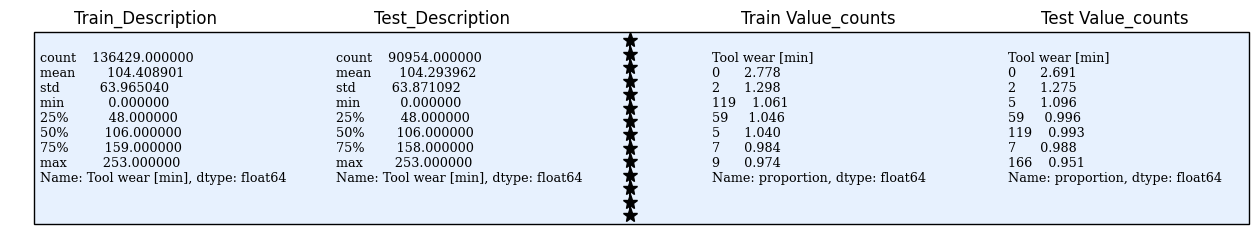

In [36]:
describ('Tool wear [min]')

####Boxen Plot: Machine failure Data distribution of different type of machine & Train Test dataset comparison

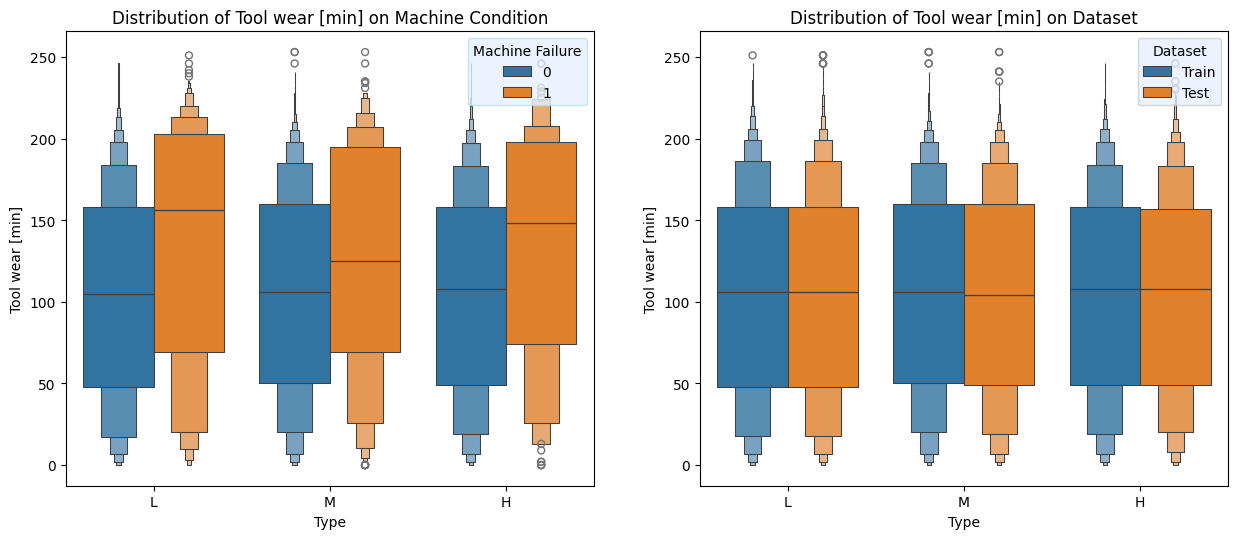

In [37]:
boxen('Tool wear [min]')

####Histogram Plot: Frequency distribution Tool wear based on machine failure

In [38]:
histo('Tool wear [min]')

Running Data skewness based on Tool wear [min]: -0.026557423363755064
Failed Data skewness based on Tool wear [min]: -0.4120915871979794


Insights from the plot

* Above plots represent the distribution of Tool wear duration data based on Machine condition (failed or not).

  * Above Histplot shows the percentage of data distribution separately of machine run and machine failure based on Tool wear duration.

  * Histogram plot represents that Machine failed data is almost uniformly distributed but is slightly higher at higher tool wear duration, especially above 200 Minutes.

  * *For machine running conditions, also the distribution is almost normal with skewness of just (-0.026)


* From the Boxen plot, we can also see that when the machine failed, the tool wear duration is slightly above in comparison to the condition when the machine runs.

* Boxen plot (2) represents that data distribution of Tool wear is similar for both train and test datasets of each machine type.


#### **Relationships between different numerical Variables**

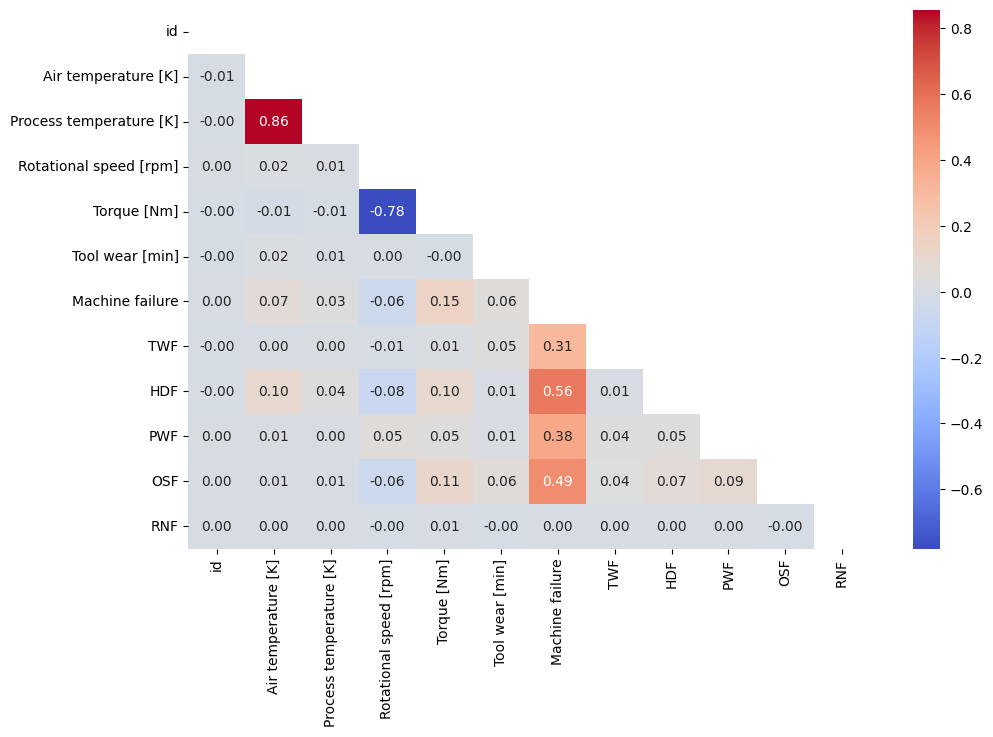

Correlation


In [39]:
plt.figure(figsize=(11,7)) #  Defining figure dimension
corr=ta_train.corr(numeric_only=True) # Correlation between different numerical columns
matr=np.triu(np.ones_like(corr, dtype='bool'))
sns.heatmap(corr, annot=True, mask=matr, fmt='.2f', cmap='coolwarm')
plt.show()
print('Correlation')

Insights from the plot

* For the representation of relation between different variables in our dataset, I have used the Correlation Plot, because the Correlation plot plot is one of the best choices to show the correlation between different variables in numerical form.

* In this plot we can see that Air temperature and Process temperature are highly correlated, whereas Torque and Rotational speed are negatively related to each other.


##***4. Conclusion and Suggestion from Exploratory Data Analysis***

* The dataset contains about 98.4% of machine running data and just about 1.6% of machine failed data, making the dataset highly imbalanced.

* Major potential cause of machine failure is Heat Dissipation for all types of machines (low, medium, high), contributing about 34%, occuring when the machine components overheat.
To minimize heat dissipation failure, it is advised to improve the cooling system by implementing more efficient heat sinks, high power fans connected to temperature sensors to control airflow, utelizing liquid cooling solution if suitable, and other methods to prevent components from overheating.


* For low machines, OverStrain failure is the cause of machine failure in the majority of instances, contributing over 31%, caused when the applied stress is very high. To reduce OSF, it is advised to maintain proper load on the machine by implementing a system to monitor and control the load on the machine.

* Power Failure is the other major mode of machine failure which overall contributes about 15%, caused by disruption in the stable electric supply or internal wiring and circuit issues in machines. Power failure can be minimized by monitoring power quality and implementing solutions, preventive maintenance, etc.

* Other modes of failure are Tool Wear failure contributing majorly to Medium and High Machines. To control tool wear failure, try to minimize the temperature of tool wear during operation by using appropriate cutting fluids.

* All the continuous features that are responsible for machine status are almost clearly separable within the data distribution.
  * In case of Air Temperature and Process Temperature, machines are generally
  failed at higher temperature whereas the instances when the machine did not fail are almost uniformly distributed.

  * Rotational Speed: The majority of machine failures occurred at lower rotational speed (1200 to 1400 rpm); machine operational data distribution is almost normal between 1300 to 1800 rpm.

  * Torque: Machines generally fail when the torque is comparatively higher i.e. over 45 Nm and also when the torque is very low below 14 Nm. Machine running instances are almost normally distributed.

  * Tool wear: Tool wear duration data is almost uniformly distributed, having slightly higher probability of machine failure at longer periods.

* The data distribution and range of different features of the Train and Test dataset are similar.

* Air Temperature and Process Temperature are highly positively correlated whereas Torque and Rotational Speed are highly negatively correlated but these relations are not sufficient to remove any feature. Except for these, there are no highly related features.







## ***5. Feature Engineering and Data Pre-Processing***

### Cleaning Feature names by removing brackets and spaces

In [40]:
#Cleaning feature names by replacing spaces with underscore and removing brackets
ta_train.columns=ta_train.columns.str.replace('[','').str.replace(']','').str.replace(' ','_')
ta_test.columns=ta_test.columns.str.replace('[','').str.replace(']','').str.replace(' ','_')

### Categorical Encoding

In [41]:
# Converting Categorical column(Type) to Numerical Column
ta_train=pd.get_dummies(ta_train, columns=['Type'], dtype='int64')

The dataset that we have contains only one categorical variable i.e. 'Type' that indicates the type of Machine as 'L' for low, 'M' for medium, and 'H' for high. Here these values have equal weightage, so we can treat this variable as nominal. So, One-Hot Encoding looks like a better choice for encoding this variable.

### Data Scaling

In [42]:
#Listing Continuous column Names
continuous_columns=[]
for col in ta_train.columns:
  if ta_train[col].nunique()>10 and ta_train[col].dtypes!='object':
    continuous_columns.append(col)
ta_train[continuous_columns]=StandardScaler().fit_transform(ta_train[continuous_columns])

In this dataset, we have a few continuous variables that are required to be scaled to a common scale. In our dataset, we have some outliers that can provide important information. Since we have outliers in our dataset, therefore I have used Standard Scaler as it reduces the impact of outliers.

### Data Splitting

In [43]:
x=ta_train.drop(['id', 'Product_ID', 'Machine_failure', 'Type_M'], axis=1)
y=ta_train['Machine_failure']

#Creating train set and test set from Training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, shuffle=True, stratify=y, random_state=21)
print(f'X_train_shape: {x_train.shape}\nx_test_shape: {x_test.shape}\ny_train_shape: {y_train.shape} \ny_test_shape: {y_test.shape}') #Check train and test set shape

X_train_shape: (109143, 12)
x_test_shape: (27286, 12)
y_train_shape: (109143,) 
y_test_shape: (27286,)


For splitting the data in train and test set, I have kept the ratio of 80:20 because the dataset we have is highly imbalanced, so we require huge data for training purposes.

### Defining Function for model's performance Evaluation at base Threshold

In [44]:
score_column=['Train_Score', 'Test_Score', 'Precision_Score', 'Recall_Score', 'F1_Score', 'ROC_AUC_Score','FP_FN_%_Ratio'] # List to store result score names
clasf_store=[] # List to store Classifier Alias and name
thresh_store=[]

def base_scores(clasf, column_name):
  clasf_store.append([clasf, column_name])

  fig, ax=plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios':[2,5,7], 'wspace':0.2777})

  # Plot Heatmap to Show Classifier scores
  cm_base=confusion_matrix(y_test, clasf.predict(x_test))
  tn_base= round((cm_base[0,0]/cm_base[0].sum()*100),2)
  fp_base= round((cm_base[0,1]/cm_base[0].sum()*100),2)
  fn_base= round((cm_base[1,0]/cm_base[1].sum()*100),2)
  tp_base= round((cm_base[1,1]/cm_base[1].sum()*100),2)

  df_base=pd.DataFrame([clasf.score(x_train, y_train), accuracy_score(y_test, clasf.predict(x_test)), precision_score(y_test, clasf.predict(x_test)), recall_score(y_test, clasf.predict(x_test)),
                        f1_score(y_test, clasf.predict(x_test)), roc_auc_score(y_test, clasf.predict_proba(x_test)[:,1]), fp_base],score_column, columns=[column_name]).round(5)
  df_value=np.concatenate((df_base.values[:-1], np.array([[f"{fp_base}% / {fn_base}%"]])), axis=0)

  sns.heatmap(df_base, annot=df_value, fmt='', cmap='Blues', cbar=False, ax=ax[0], linewidths=0.21, linecolor='white', vmin=0, vmax=1)
  ax[0].set_xticklabels([f'{column_name} Score'])

  ax[0].xaxis.tick_top()


  # Classifier's Confusion matrix
  cm_base=confusion_matrix(y_test, clasf.predict(x_test))
  base_annot=np.array([[f"Actual=Operational\nPredicted=Operational\n\n{cm_base[0,0]}\n\n{tn_base}%", f"Actual=Operational\nPredicted=Failed\n\n{cm_base[0,1]}\n\n{fp_base}%"],
                       [f"Actual=Failed\nPredicted=Operational\n\n{cm_base[1,0]}\n\n{fn_base}%", f"Actual=Failed\nPredicted=Failed\n\n{cm_base[1,1]}\n\n{tp_base}%"]])

  sns.heatmap(cm_base, annot=base_annot, fmt='', cmap='coolwarm', xticklabels=False, yticklabels=False, cbar=False, ax=ax[1])
  ax[1].set(title='Confusion Matrix')

  # Plot True Positive Rate and False Negative Rate Curve
  fpr, tpr, thresh= roc_curve(y_test, clasf.predict_proba(x_test)[:,1])
  tnr= (1-tpr)
  tnr_value=tnr*(y_test.value_counts()[1])                                                                                              # FNR Value
  tnr_fpr_diff= np.argmin(np.abs(np.subtract(fpr, tnr)))                                                                                # Minimum corresponding difference between TPR and FNR
  min_diff_tnr_value= tnr_value[tnr_fpr_diff]                                                                                           # FNR value at minimum proportional difference with TPR
  index=min([index for index, value in enumerate(tnr_value) if value==min_diff_tnr_value])                                              # Index at minimum proportional difference
  optimum_threshold= thresh[index]# Threshold at minimum proportional difference
  thresh_store.append([optimum_threshold, tnr[index]])

  ax_tw=ax[2].twinx()
  line1= ax[2].plot(thresh, fpr, label='FPR', color='blue') # Plot TPR
  line2= ax_tw.plot(thresh, tnr, label='TNR', color='orange') # Plot FNR
  line21= ax_tw.plot(optimum_threshold, tnr[index], 'o', label=(f"Optimum Threshold: { str(round(optimum_threshold,5))}"), color='brown') # Plot point at minimum TPR and FNR difference
  ax[2].legend(handles=line1+line2+line21)

  # Apply limit in visualization
  ax[2].set(xlabel='Threshold', ylabel='False Positive Rate', title='FPR-TNR Curve', xlim=(optimum_threshold*0.51, optimum_threshold*1.51), ylim=(tnr[index]*0.51, tnr[index]*1.51))
  ax_tw.set(ylabel='True Negative Rate', ylim=(tnr[index]*0.51, tnr[index]*1.51))

  # Create grids in the plot
  ax[2].minorticks_on()
  ax[2].grid(which='major', linewidth=1)
  ax[2].grid(which='minor', linewidth=0.5, linestyle='dashed', color='#b5b5ee')
  ax[2].yaxis.set_minor_locator(AutoMinorLocator(5))
  ax[2].xaxis.set_minor_locator(AutoMinorLocator(5))

  # Set Tick label values
  tpr_tick=[f'({round((x)*(y_test.value_counts()[0]))})' for x in ax[2].get_yticks()]
  fnr_tick=[f'({round((x)*(y_test.value_counts()[1]))}) {round(x*100)}%' for x in ax_tw.get_yticks()]
  ax[2].set_yticklabels(tpr_tick)
  ax_tw.set_yticklabels(fnr_tick)

  # Create Rectangular box over plots
  fig.patches.append(plt.Rectangle((0.0392, 0), 0.9255, 0.9451, facecolor='#e7f1fe', transform=fig.transFigure, zorder=-1, edgecolor='k'))

  fig.suptitle(f'{column_name} At Base Threshold (0.5)', y=1.007)

  return plt.show()


The above function is defined to represent the performance of the model that we will use. In this function, I have plotted three charts providing the following information:

Chart-1: In the first visualization I have plotted the heatmap which represents different Evaluation metrics of the specific model.

Chart-2: In this visualization I have plotted the Confusion Matrix annotating each part with the actual value, percentage of actual same class (e.g. TP out of total TP and FN out of total TP), and labeling.

Chart-3: This chart is for the visualization of False Positive Rate and True Negative Rate at different Thresholds in Line form. This plot is to find the optimum Threshold at which the proportion of both False Positives and False Negative is balanced.

NOTE: This information is for above function resulting at base Threshold (0.5) and also for Below function resulting at Evaluated Threshold.

### Defining Function for Model's Performance Evaluation at optimum Threshold

In [45]:
evclasf_store=[] # List to store classifier alias, name and optimim threshold
def evaluated_result(clasf, column_name, evaluated_thresh):

  evclasf_store.append([clasf, column_name, evaluated_thresh]) # List to store classifier, classifier name and optimum threshold

  pred=(clasf.predict_proba(x_test)[:,1]>=evaluated_thresh).astype(int)# Predicted probability of x_test at evaluated threshold

  fig, ax= plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios':[2,5,7], 'wspace':0.2951})

  # Plot heatmap to show classfier score after evaluation

  cm_ev=confusion_matrix(y_test, pred)
  tn_ev=round((cm_ev[0,0]/cm_ev[0].sum()*100),2)
  fp_ev=round((cm_ev[0,1]/cm_ev[0].sum()*100),2)
  fn_ev=round((cm_ev[1,0]/cm_ev[1].sum()*100),2)
  tp_ev=round((cm_ev[1,1]/cm_ev[1].sum()*100),2)

  df_ev= pd.DataFrame([clasf.score(x_train, y_train), accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred),
                       f1_score(y_test, pred), roc_auc_score(y_test, clasf.predict_proba(x_test)[:,1]), fp_ev], score_column, columns=[column_name]).round(5)

  df_ev_value=np.concatenate((df_ev.values[:-1], np.array([[f"{fp_ev}% / {fn_ev}%"]])), axis=0)
  sns.heatmap(df_ev, annot=df_ev_value, fmt='', cmap='Blues', cbar=False, ax=ax[0], linewidths=0.21, linecolor='white', vmin=0, vmax=1.1)
  ax[0].set_xticklabels([f'{column_name} Score'])
  ax[0].xaxis.tick_top()

  # Confusion matrix at evaluated threshold
  cm_ev=confusion_matrix(y_test, pred)
  annot_label=np.array([[f"Actual=Operational\nPredicted=Operational\n\n{cm_ev[0,0]}\n\n{tn_ev}%", f"Actual=Operational\nPredicted=Failed\n\n{cm_ev[0,1]}\n\n{fp_ev}%"],
                         [f"Actual=Failed\nPredicted=Operational\n\n{cm_ev[1,0]}\n\n{fn_ev}%", f"Actual=Failed\nPredicted=Failed\n\n{cm_ev[1,1]}\n\n{tp_ev}%"]])
  sns.heatmap(cm_ev, annot=annot_label, fmt='', cmap='coolwarm', cbar=False, ax=ax[1], xticklabels=False, yticklabels=False)

  ax[1].set(title='Confusion Matrix')


  fpr_ev, tpr_ev, thresh_ev= roc_curve(y_test, clasf.predict_proba(x_test)[:,1])
  tnr_ev=1-tpr_ev

  # Plot TPR and FNR
  ax_1= ax[2].twinx()
  line_tpr= ax[2].plot(thresh_ev, fpr_ev, label='FPR', color='blue')
  line_fnr= ax_1.plot(thresh_ev, tnr_ev, label='TNR', color='orange')
  scatter_pointev=ax_1.plot(evaluated_thresh, thresh_store[-1][-1], 'o', label=(f"Thresh: {str(round(evaluated_thresh,5))}"), color='brown')
  ax[2].legend(handles=line_tpr+line_fnr+scatter_pointev)

  # Create grids in the plot
  ax[2].minorticks_on
  ax[2].grid(which='major', linewidth=1)
  ax[2].grid(which='minor', linewidth=0.51, linestyle='dashed', color='#d5d5e5')
  ax[2].yaxis.set_minor_locator(AutoMinorLocator())
  ax[2].xaxis.set_minor_locator(AutoMinorLocator())

  # Set tick label values and axis labels
  ytpr_value=[f'({round((x)*(y_test.value_counts()[0]))})' for x in ax[2].get_yticks()]
  yfnr_value=[f'({round((x)*(y_test.value_counts()[1]))}), {round(x*100)}%' for x in ax_1.get_yticks()]
  ax[2].set_yticklabels(ytpr_value)
  ax_1.set_yticklabels(yfnr_value)

  ax[2].set(xlabel='Threshold', ylabel='False Positive Rate', title=f'FPR-TNR Curve at Threshold: {evaluated_thresh:.5f}')
  ax_1.set(ylabel='True Negative Rate')

  # Create box over subplots
  fig.patches.append(plt.Rectangle((0.037, 0), 0.94, 0.9451, facecolor='#e7f1fe', transform=fig.transFigure, zorder=-1, edgecolor='k'))

  fig.suptitle(f'{column_name} At Evaluated Threshold {evaluated_thresh:.5f}', y=1.007)

  return plt.show()


## ***6. Machine Learning Model Implementation***

### **AdaBoost Classifier**

 Here I have used AdaBoost Classifier as it combines multiple weak classifiers to create a strong classifier. It is particularly effective in binary classification problems and scenarios with noisy data.

In [46]:
ab=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=29))
ab.fit(x_train, y_train)
class_list=[ab]
title_list=['AdaBoost']

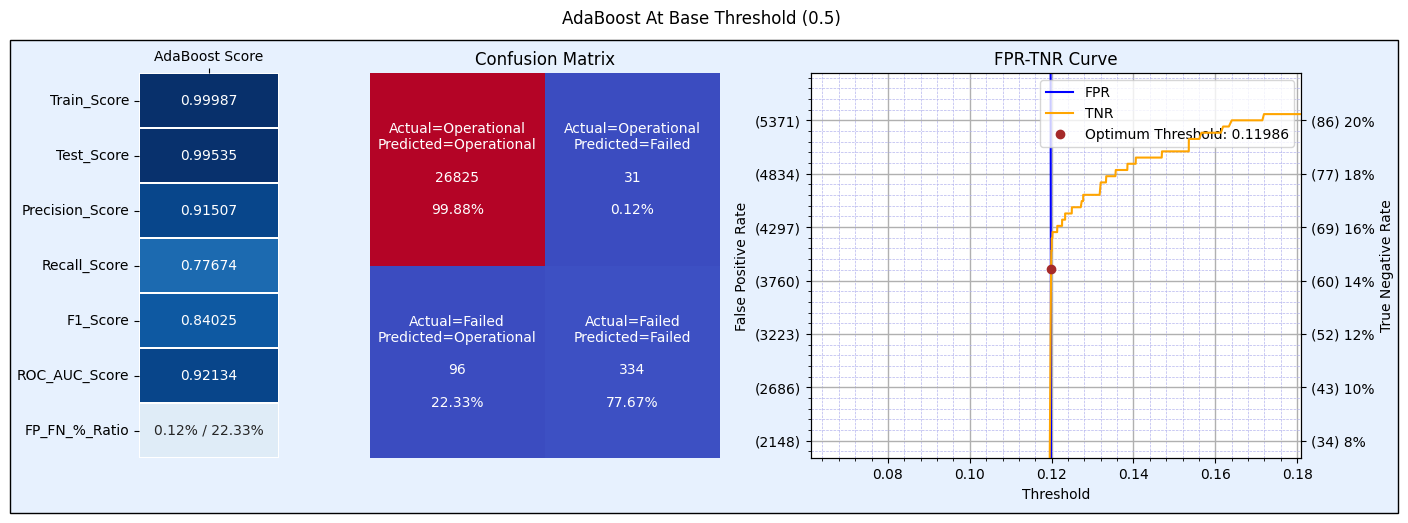

In [47]:
base_scores(class_list[-1], title_list[-1])

In [48]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights from base threshold

  * From the first part (at threshold=0.5) we see that our model is very effective in detecting True Negative values.

  * Additionally, we see that False Positive values are also detected very well.


  * But when it comes to False Negative, our model struggles in predicting correctly (because of highly imbalanced data).

  * Since our aim is to predict machine status, it is very important to minimize False Negatives.

Insights from evaluated threshold


* In the second part (at the evaluated threshold) we see that our model is very effective in detecting True Negative values.

* Additionally, due to adjustment in the threshold the False Negative values are also improved. Although the value of False Positive is increased, but that may not create any problem.

### **CatBoost Classifier**

### CatBoost Hyperparameter tuning using RandomizedSearch CV

* CatBoost Classifier is based on gradient boosting framework. It combines the strengths of multiple weak learners to produce a predictive model. Two most important features of this model are ordered boosting and efficient handling of categorical features.

* I will utilize CatBoost Classifier model by optimizing the best parameters using Randomized search CV.

* Catboost combination with RandomizedsearchCV offers a powerful way to train and tune gradient boosting models. The key features of this combination include automatic handling of categorical features, efficient training with GPU support, etc.

In [49]:
# Define Hyperparameters and their possible values
cb_params={'iterations':randint(51,500),
           'scale_pos_weight':randint(11,121),
           'depth':randint(2,9),
           'learning_rate':uniform(0.01,.2),
           'random_strength':randint(0,101),
           'bagging_temperature':uniform(0.01,21),
           'od_type':['IncToDec','Iter'],
           'od_wait':randint(11,51)}

# Use Randomized search to find optimal parameters
cb_rs=RandomizedSearchCV(CatBoostClassifier(silent=True), param_distributions=cb_params, cv=7, random_state=21, verbose=False, scoring='recall')

# Fit Model
cb_rs.fit(x_train, y_train)

# Define Classifier with best parameters
cb=CatBoostClassifier(**cb_rs.best_params_, silent=True)
cb.fit(x_train, y_train)

print(cb_rs.best_params_)

# Add classifier to class list
class_list.append(cb)
title_list.append('CatBoost_RS')

{'bagging_temperature': np.float64(1.0332224969916732), 'depth': 2, 'iterations': 311, 'learning_rate': np.float64(0.15419326936624597), 'od_type': 'IncToDec', 'od_wait': 46, 'random_strength': 60, 'scale_pos_weight': 109}


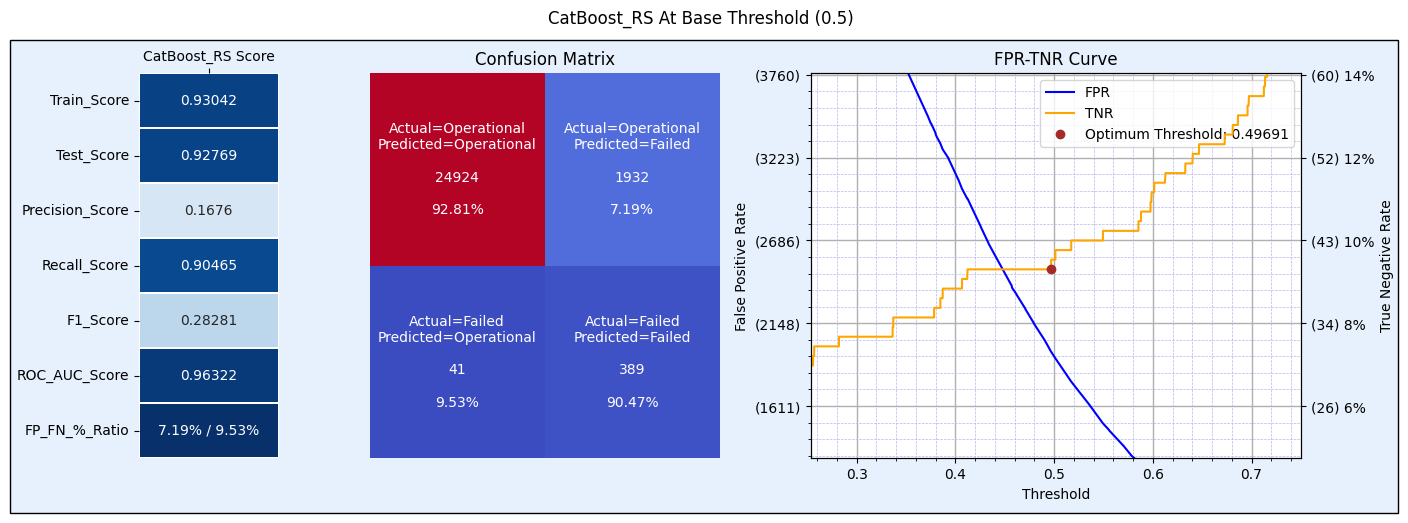

In [50]:
base_scores(class_list[-1], title_list[-1])

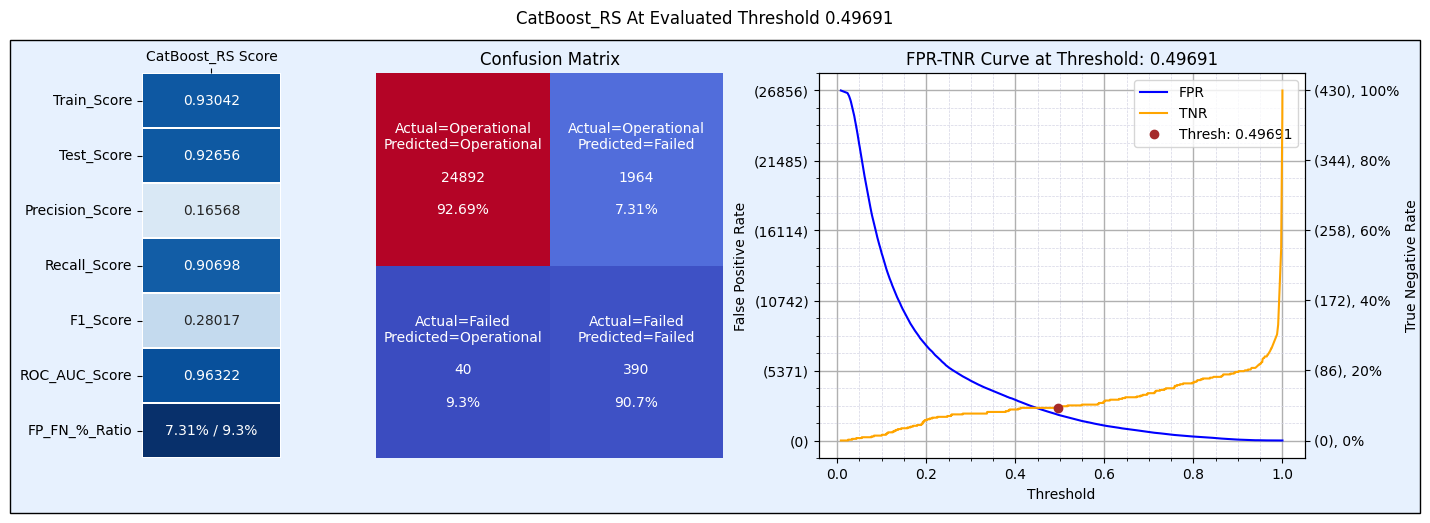

In [51]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights from base threshold

* At first glance, we see that CatBoost Classifier (with optimum parameters and at threshold=0.5) model is performing very well at detecting True Negative values.

* Additionally, we can see that although the False Positive values are a bit higher, the model has performed well in detecting True Positives which is an important metric for our model.

Insights from evaluated threshold

* In the second part, we see that the True Negative values have slightly improved.

* Slight increase in False Positive can be ignored as False Negative is more important to be minimized.



### CatBoost Classifier with HyperOpt

CatBoost Classifier when combined with Hyperopt for hyperparameter tuning offers several key features for optimizing model performance. These features include Automatic Hyperparameter tuning, Efficient search strategies, GPU Acceleration, Early Stoppings, Flexibility and customization, easy use, etc.

In [52]:
# Define Parameter space for Optimization
space_cb={'iterations':hp.randint('iterations',21,510),
          'scale_pos_weight':hp.randint('scale_pos_weight',21,110),
          'depth':hp.randint('depth',2,9),
          'learning_rate':hp.uniform('learning_rate',0.001,0.15),
          'random_strength':hp.randint('random_strength',1,101),
          'bagging_temperature':hp.uniform('bagging_temperature', 0.01,51),
          'od_wait':hp.randint('od_wait',11,51)}

# Define objective function to be optimized
def hyper_cb(params):
  params={'iterations':params['iterations'],
          'scale_pos_weight':params['scale_pos_weight'],
          'depth':params['depth'],
          'learning_rate':params['learning_rate'],
          'random_strength':params['random_strength'],
          'bagging_temperature':params['bagging_temperature'],
          'od_wait':params['od_wait']}

  cb_hp=CatBoostClassifier(**params, silent=True)

  # Utelize cross validation to estimate performance
  best_score=cross_val_score(cb_hp, x_train, y_train, scoring='roc_auc', error_score='raise').mean()
  return 1-best_score

# Minimize error
cb_best_params=fmin(fn=hyper_cb, space=space_cb, algo=tpe.suggest, max_evals=11)

# Define classifier with best parameters
cb_hpop=CatBoostClassifier(**cb_best_params, silent=True)
cb_hpop.fit(x_train, y_train)

class_list.append(cb_hpop)
title_list.append('Catboost_HPOP')

100%|██████████| 11/11 [07:08<00:00, 38.99s/trial, best loss: 0.03722848409487356]


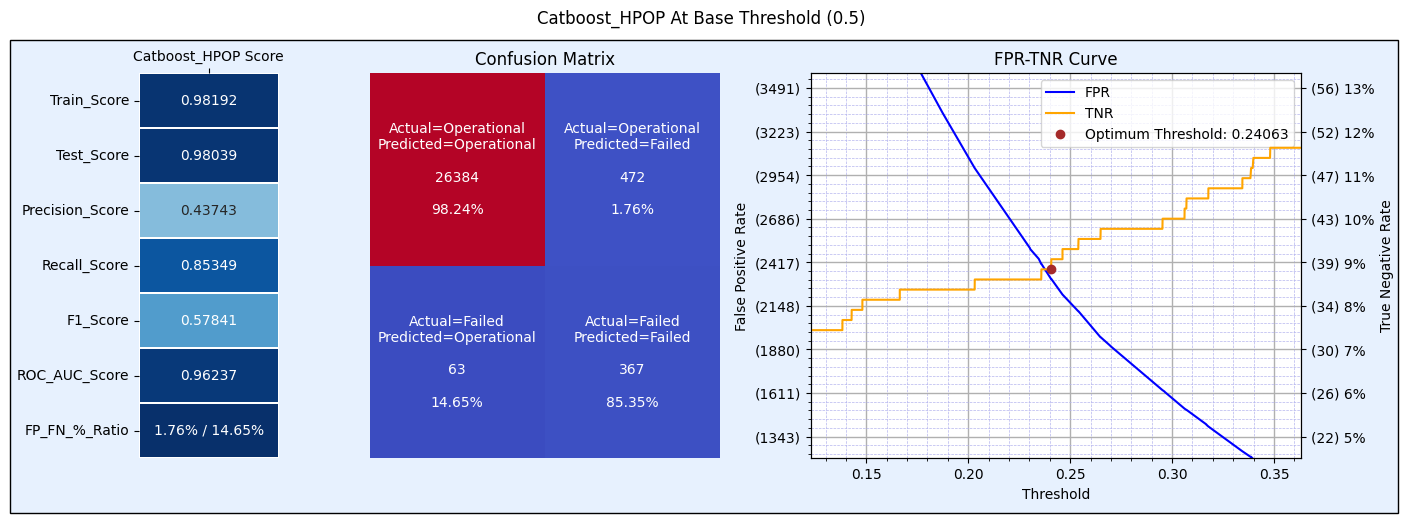

In [53]:
base_scores(class_list[-1], title_list[-1])

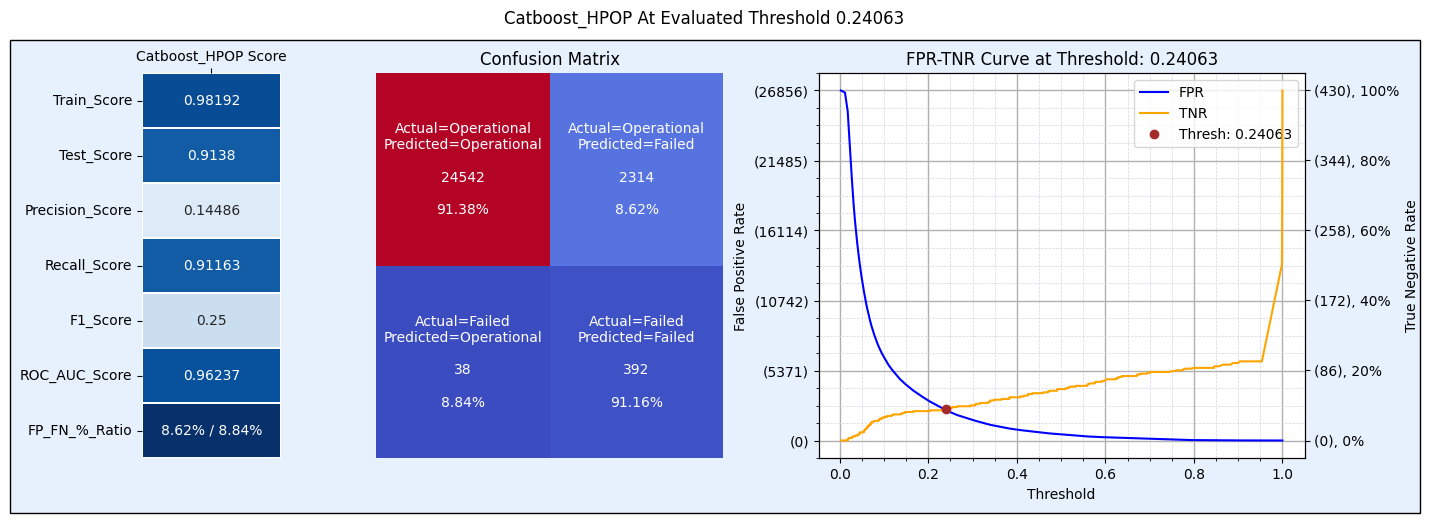

In [54]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold

* Catboost Classifier with optimum parameters (optimized by Hyperopt) at base threshold (0.5) works well in predicting True Negatives.
For the case of True Positives, the performance of this model is not so good.



Insights at evaluated threshold

* At the evaluated threshold of this model, we see that the performance is improved in predicting True Positives.
But in the meantime, our model results in more False Positives.

###**Light GBM**

* Light Gradient Boosting Machine is a high-performance gradient boosting system. It is intended for efficient training of large-scale machine learning models.

* Ability to work quickly and efficiently, even with large datasets, makes LightGBM so special. It uses techniques like GOSS (Gradient-Based One Side Sampling) to speed up training by focusing on most important data points and EFB (Exclusive Feature Bundling) to group related features together, making it easier for the model to learn patterns.


### LGBM Randomized SearchCV Hyperparameter tuning

* LightGBM combined with Randomized searchCV for hyperparameter tuning offers several features like faster training speed, higher accuracy, low memory usage, and the ability to handle large datasets to make a powerful and efficient machine learning algorithm.

In [55]:
# Define hyperparameters and their possible values
lg_params={'metric':['binary_logloss'],
           'scale_pos_weight':randint(21,251),
           'num_leaves':randint(50,251),
           'n_estimator':[1000],
           'min_child_sample':randint(64,512),
           'reg_alpha':uniform(.1,10),
           'reg_lambda':uniform(.1,10),
           'max_depth':randint(1,51),
           'min_data_in_leaf':randint(1,51),
           'max_bin':randint(1,251),
           'verbose':[-1]}

# Utelize Randomized search to find optimal parameters
lgbm_rs=RandomizedSearchCV(lgb.LGBMClassifier(), lg_params, cv=7, random_state=21, scoring='roc_auc')
lgbm_rs.fit(x_train, y_train)

# Define classifier with optimum parameters
lg=lgb.LGBMClassifier(**lgbm_rs.best_params_)
lg.fit(x_train, y_train)

# Add classifier to class list and model name to title list
class_list.append(lg)
title_list.append('LGBM_RS')


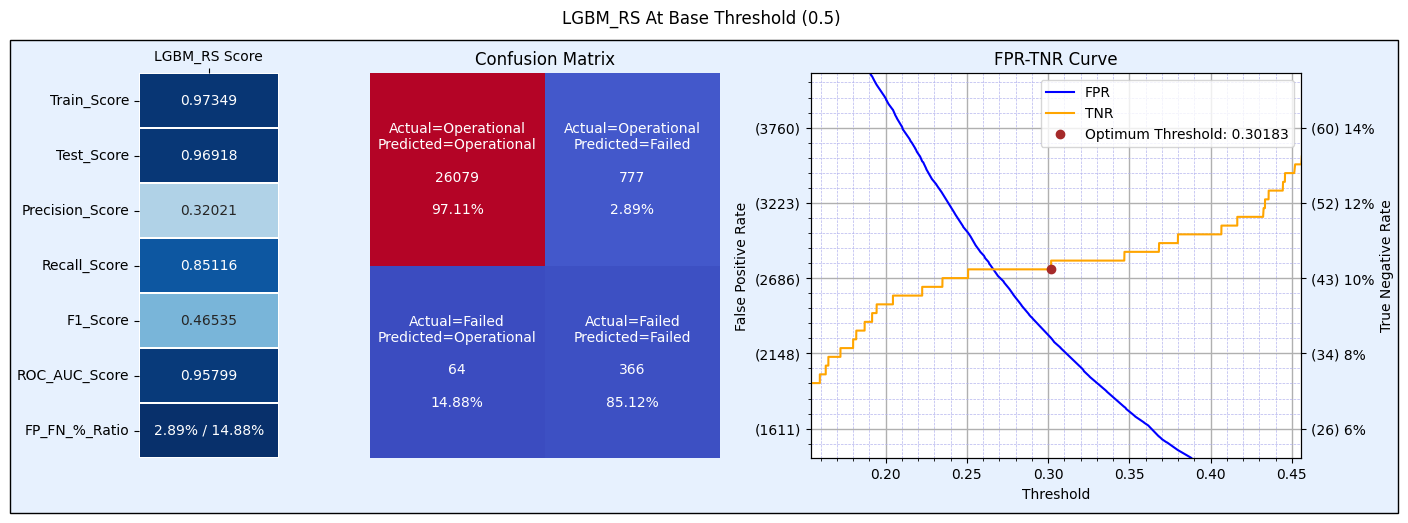

In [56]:
base_scores(class_list[-1], title_list[-1])

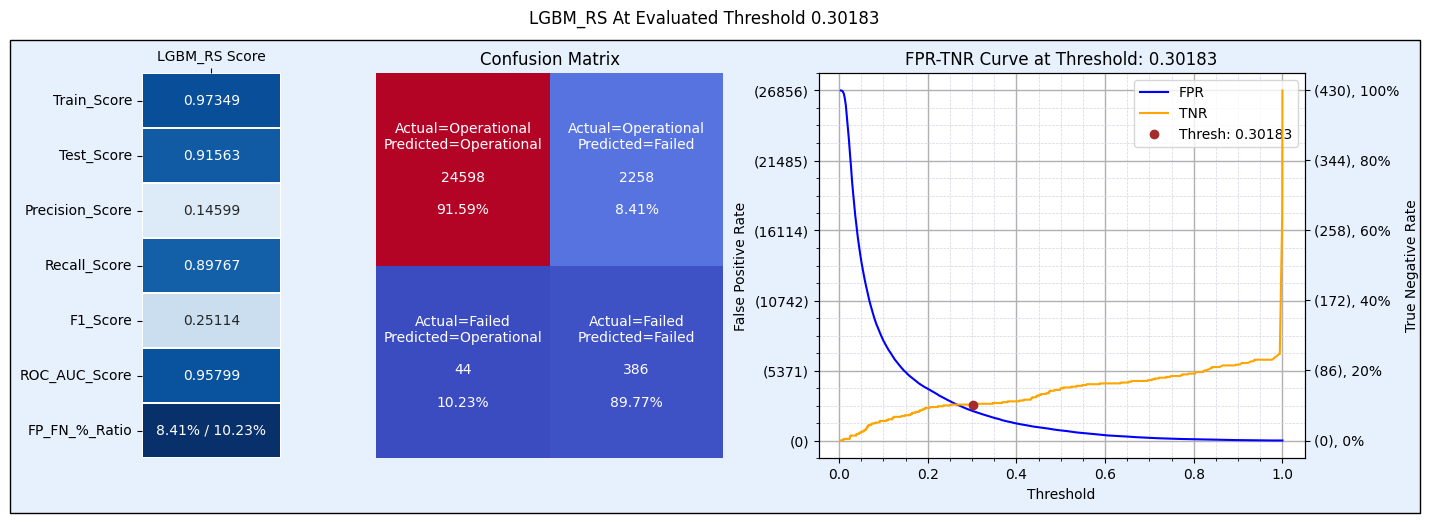

In [57]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold

* LGBM Classifier at base threshold (at 0.5) with optimum parameters (optimized by Randomized SearchCV) performs well in identifying 'True Negatives'.
In identifying 'True Positives' the model's performance is also good as it identifies most values correctly.

Insights at evaluated threshold

* At the evaluated threshold the model's performance is improved in predicting 'True Positives'.
But in identifying 'True Negatives', the model's performance is not very good as lots of values were classified wrongly.

### LightGBM optimized by Optuna

Hyperparameter tuning using Optuna with LightGBM allows efficient exploration of parameter combinations to optimize model performance.
LightGBM with Optuna hyperparameter tuning offers features like efficient hyperparameter optimization, automatic search and pruning, scalability and parallelization, customizable search space, support for categorical features,  etc. that help to improve model performance.

In [58]:
# Define an objective function to be minimized
def objective(trial):
  # Define hyperparameter to tune
  lgbm_params={'num_leaves':trial.suggest_int('num_leaves',20,251),
               'min_child_sample':trial.suggest_int('min_child_sample', 64,512),
               'reg_alpha':trial.suggest_float('reg_alpha',0.1,10),
               'reg_lambda':trial.suggest_float('reg_lambda',0.1,10),
               'max_depth':trial.suggest_int('max_depth',1,51),
               'min_data_in_leaf':trial.suggest_int('min_data_in_leaf',1,51),
               'max_bin':trial.suggest_int('max_bin',1,251),
               'n_estimators':trial.suggest_int('n_estimators',1,1000)}

  # Create LightGBM model with suggested parameters
  model_lgbm=lgb.LGBMClassifier(**lgbm_params, n_jobs=-1,random_state=21, is_unbalance=True, verbosity=-1)
  cv=StratifiedKFold(n_splits=7)
  result_lgbm=cross_val_score(model_lgbm, x_train, y_train, cv=cv, scoring='roc_auc', error_score='raise').mean()
  return result_lgbm

# Create and optimize optuna study
study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=11)
best_lgbm=study.best_params

print(best_lgbm)

# Define classifier with optimum parameters
lgbm=lgb.LGBMClassifier(**best_lgbm)
lgbm.fit(x_train, y_train)

class_list.append(lgbm)
title_list.append('LightGBM_OP')

[I 2025-09-29 08:45:53,080] A new study created in memory with name: no-name-82ba663e-b124-4b8b-a451-87dc54ebf1a3
[I 2025-09-29 08:46:29,341] Trial 0 finished with value: 0.9570432376805195 and parameters: {'num_leaves': 210, 'min_child_sample': 448, 'reg_alpha': 1.1283494919976582, 'reg_lambda': 3.3564743442591607, 'max_depth': 29, 'min_data_in_leaf': 8, 'max_bin': 243, 'n_estimators': 199}. Best is trial 0 with value: 0.9570432376805195.
[I 2025-09-29 08:46:57,239] Trial 1 finished with value: 0.9574260267965714 and parameters: {'num_leaves': 237, 'min_child_sample': 400, 'reg_alpha': 7.562088364873019, 'reg_lambda': 8.822295727488626, 'max_depth': 47, 'min_data_in_leaf': 50, 'max_bin': 71, 'n_estimators': 187}. Best is trial 1 with value: 0.9574260267965714.
[I 2025-09-29 08:48:01,126] Trial 2 finished with value: 0.9568351847652184 and parameters: {'num_leaves': 127, 'min_child_sample': 295, 'reg_alpha': 5.536718766322911, 'reg_lambda': 5.060883539161292, 'max_depth': 13, 'min_data

{'num_leaves': 154, 'min_child_sample': 256, 'reg_alpha': 4.6742597485910995, 'reg_lambda': 0.5976947981520798, 'max_depth': 2, 'min_data_in_leaf': 40, 'max_bin': 136, 'n_estimators': 229}


In [59]:
base_scores(class_list[-1], title_list[-1])

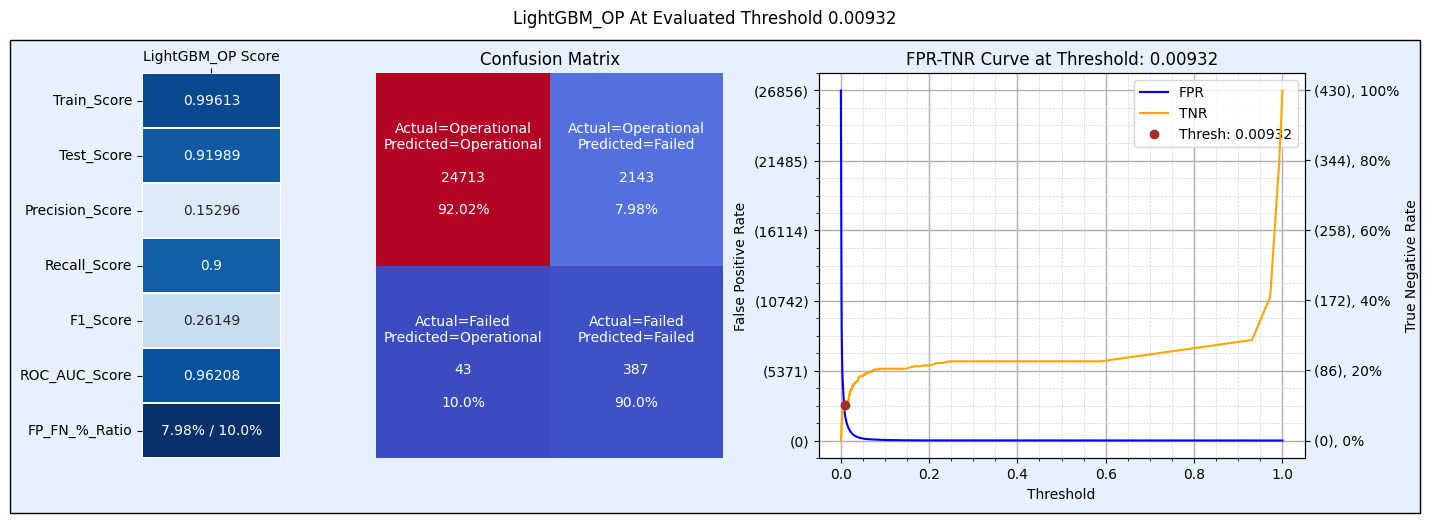

In [60]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold

* From first glance at base threshold (at 0.5) we see that LightGBM (Optimized using Optuna) performs well in detecting True Negatives but in identifying True Positives our model somewhere lags.

Insights at evaluated threshold

* From second part, at the evaluated threshold, our model performed very well in predicting True Positives, but in the meantime False Positives prediction has also increased.

###LightGBM Optimized by HyperOpt

LightGBM with its hyperopt parameter tuning excels in speed, accuracy and efficiency particularly for large datasets. The key features for this combination include leaf-wise growth that leads to more accurate and complex models, histogram-based learning that helps in reducing computational complexity and accelerating training, parallel, and GPU learning that significantly reduces training time and low memory usage so that the model can handle large datasets with minimal overhead.

In [61]:
# Define Parameter space for optimization
space_lr={'num_leaves':hp.randint('num_leaves',20,251),
          'min_child_sample':hp.randint('min_child_sample',64,512),
          'reg_alpha':hp.uniform('reg_alpha',0.1,10),
          'reg_lembda':hp.uniform('reg_lembda',0.1,10),
          'max_depth':-1,
          'min_data_in_leaf':hp.randint('min_data_in_leaf',1,51),
          'max_bin':hp.randint('max_bin', 11, 51),
          'n_estimators':hp.randint('n_estimators',1,1000)}

# Define Objective function to be optimized
def hyper_lb(params):
  params={'num_leaves':params['num_leaves'],
          'min_child_sample':params['min_child_sample'],
          'reg_alpha':params['reg_alpha'],
          'reg_lembda':params['reg_lembda'],
          'max_depth':params['max_depth'],
          'min_data_in_leaf':params['min_data_in_leaf'],
          'max_bin':params['max_bin'],
          'n_estimators':params['n_estimators']}

  lgbm_bo=lgb.LGBMClassifier(**params, random_state=21, verbosity=-1)

  # Use cross validation to estimate performance
  best_score=cross_val_score(lgbm_bo, x_train, y_train, scoring='roc_auc', error_score='raise' ).mean()
  return 1-best_score

# Minimize error
lgbm_best_params=fmin(fn=hyper_lb, space=space_lr, algo=tpe.suggest, max_evals=11)

# Define classifier with optimized parameters
lgbm_ho=lgb.LGBMClassifier(**lgbm_best_params, random_state=21)
lgbm_ho.fit(x_train, y_train)

class_list.append(lgbm_ho)
title_list.append('LightGBM_HPOP')

100%|██████████| 11/11 [03:23<00:00, 18.48s/trial, best loss: 0.0380931406022359]


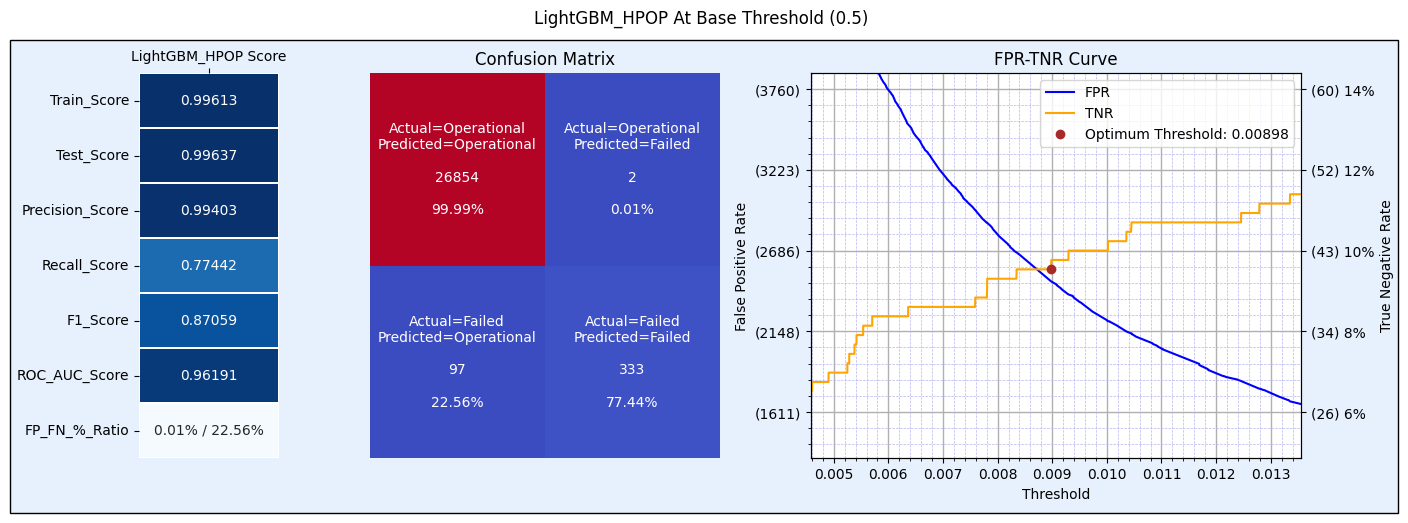

In [62]:
base_scores(class_list[-1], title_list[-1])

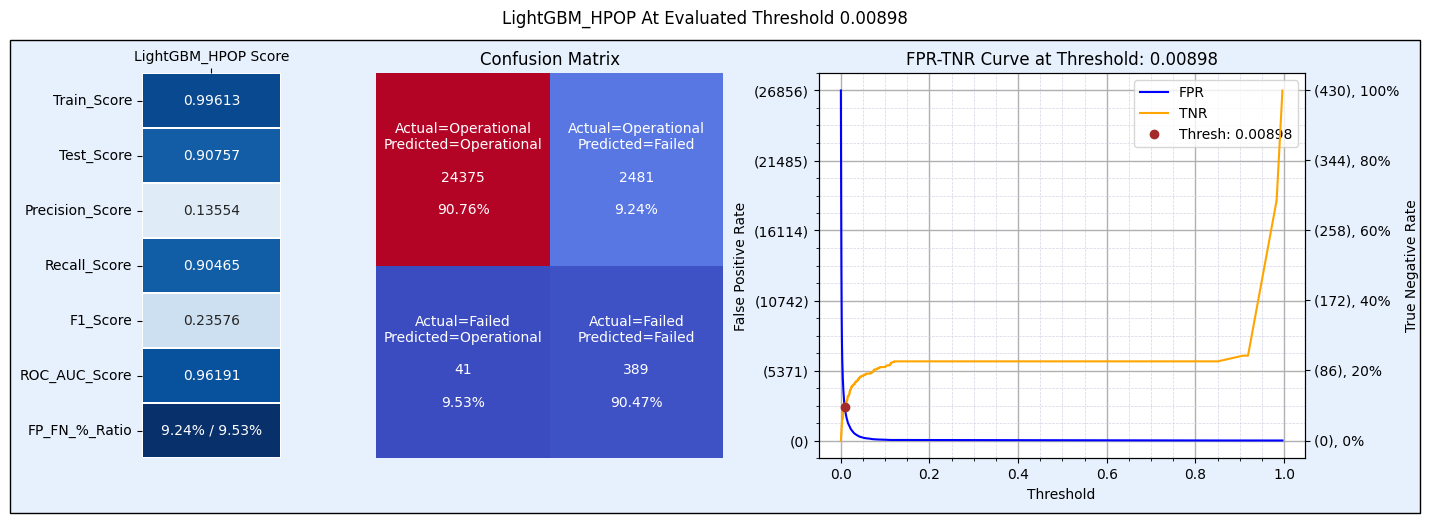

In [63]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold

* At the first glance, we see that LightGBM with its optimum parameters (optimized by Hyperopt) at base threshold (0.5), predicted almost all the True Negatives correctly.
But in predicting True positives, the model's performance is not so good.


Insights at evaluated threshold

* At the evaluated threshold, we see that the model's performance has improved in predicting True Positives.
In the meanwhile, False Positives are also increased.

### **Logistic Regression**

Logistic Regression is a powerful and versatile model for binary classification problems, offering insights into the relationship between predictors and the probability of binary outcomes. Its interpretability, regularization ability, ability to handle different types of predictors, and flexibility for model tuning make it a popular choice in various applications.



The combination of Logistic Regression with Randomized Search for hyperparameter tuning leverages the ability to quickly explore various parameter settings and find the optimal combination for improved prediction accuracy.

In [64]:
# Define Classifier
lr=LogisticRegression()

# Define Hyperparameters and their possible values
lr_params={'penalty':['l2'],
           'class_weight':[{0:1, 1:111}, {0:1, 1:121}],
           'C':uniform(0.01,9),
           'max_iter':[1000],
           'verbose':[0]}

# Use Randomized search to find the optimal parameters for accuracy
logis_rs=RandomizedSearchCV(lr, param_distributions=lr_params, cv=7, random_state=21, scoring='roc_auc')
logis_rs.fit(x_train, y_train)

# Define classifier with optimum parameters
logis=LogisticRegression(**logis_rs.best_params_)
logis.fit(x_train, y_train)

class_list.append(logis)
title_list.append('Logistic_Randomized')


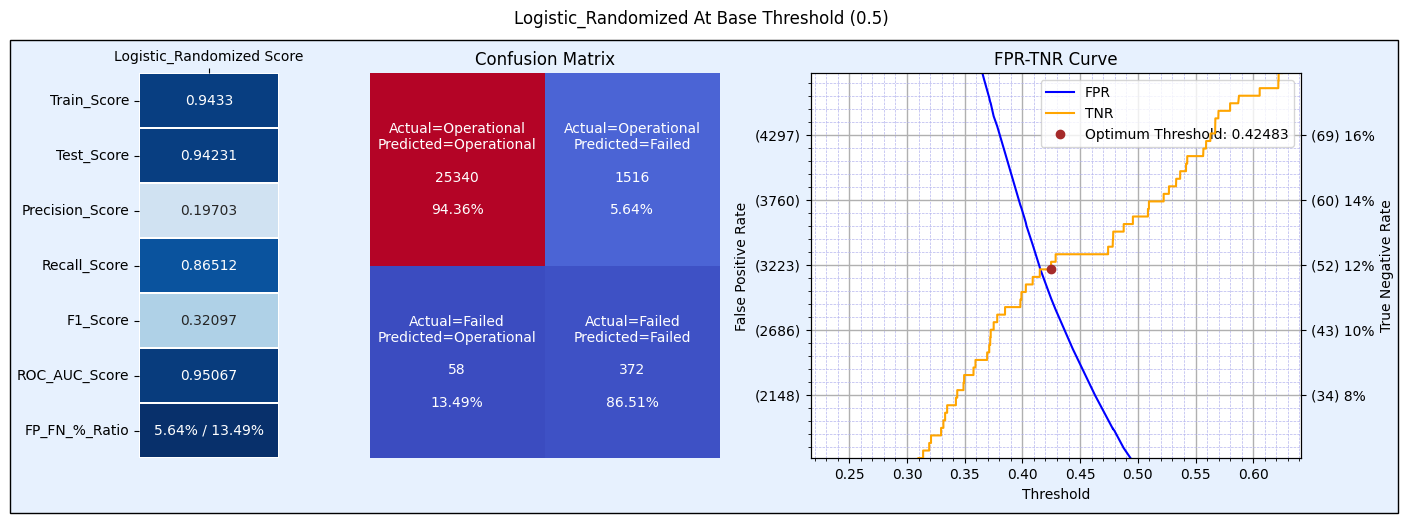

In [65]:
base_scores(class_list[-1], title_list[-1])

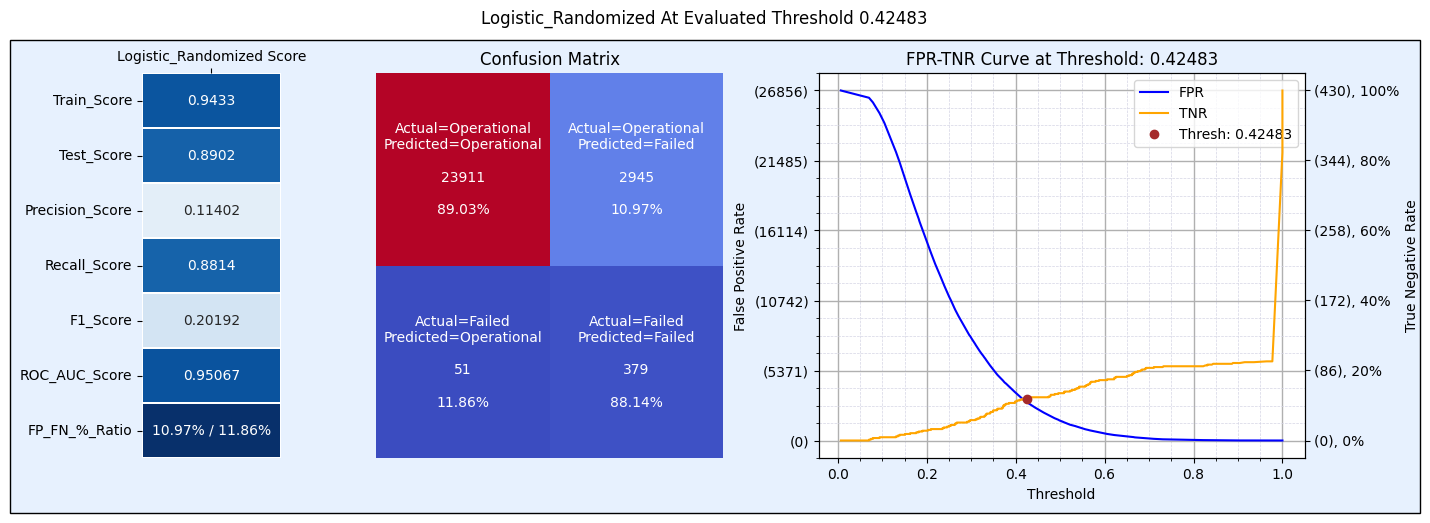

In [66]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold

* From the first part, we see that Logistic Regression with Randomized searchCV at the base threshold (0.5), performs well in identifying True Positives.

  * In identifying True Negatives this model's performance was subpar as we see lots of False Positive values.

Insights at evaluated threshold

* At the evaluated threshold, we see that the values of True Negatives are improved a bit.
But in the meanwhile, we see that there are decrements in True Positives.

###**XGBoost Classifier**

EXtreme Gradient Boosting (XGB) is an advanced machine learning algorithm designed for efficiency, speed and high performance. It is an optimized implementation of the Gradient Boosting method. Some important features of XGBoost are:-

* Parallelization: The model is implemented to train with multiple CPU cores.

* Regularization: It includes different regularization penalties to avoid overfitting, etc.

### Randomized Search hyperparameter tuning

Hyperparameter Optimization for XGBoost model using RandomizedsearchCV is particularly useful when dealing with a large number of hyperparameters or a large Dataset as it offers a balance between exploration and computational cost as compared to GridSearchCV, which tries all possible combinations.


In [67]:
# Define Classifier
xg=XGBClassifier()

# Define Parameter range and their possible values
xg_param={'learning_rate':uniform(0.001,0.15),
          'colsample_bytree':uniform(0.1,0.4),
          'n_estimaters':[1000],
          'min_child_weight':randint(1,11),
          'reg_alpha':uniform(0.001,0.5),
          'reg_lambda':uniform(0.001,0.81),
          'gamma':uniform(0.0001,0.1),
          'booster':['gbtree'],
          'max_depth':randint(1,51),
          'scale_pos_weight':randint(21,61),
          'verbosity':[0]}

# Utelize Randomize Search to find optimal hyperparameter

rs=RandomizedSearchCV(xg, param_distributions=xg_param, cv=7, scoring='recall_weighted', error_score='raise')
rs.fit(x_train, y_train)

xg=XGBClassifier(**rs.best_params_)
xg.fit(x_train, y_train)

# Add classifier alias to classifier list
class_list.append(xg)

# Add model Name to title list
title_list.append('Randomized XGBoost')

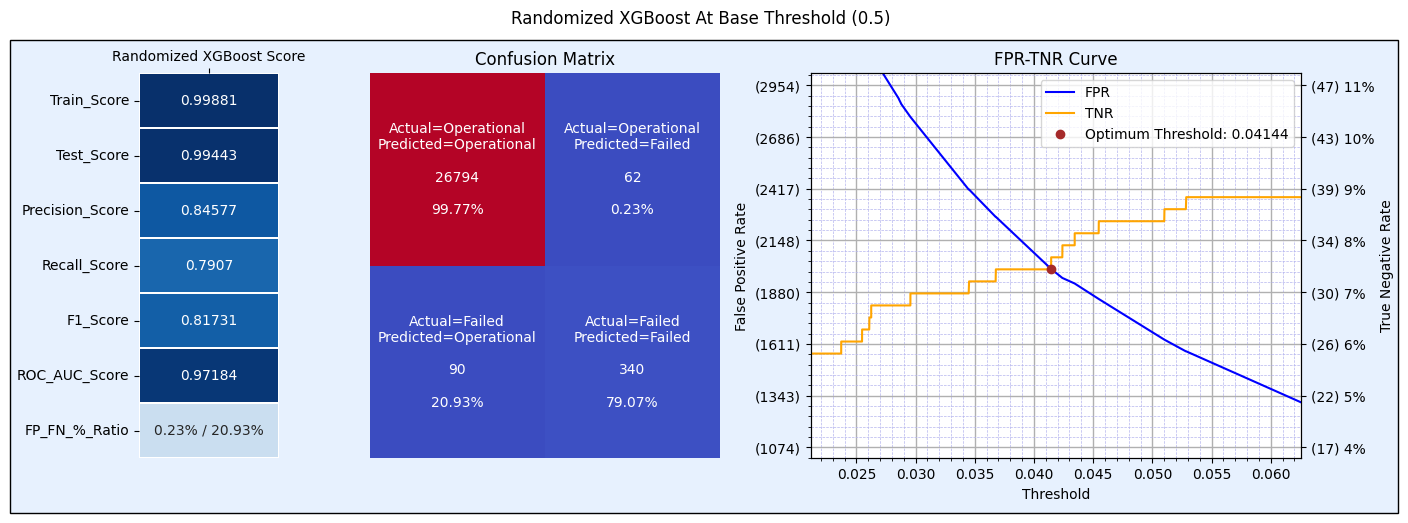

In [68]:
base_scores(class_list[-1], title_list[-1])

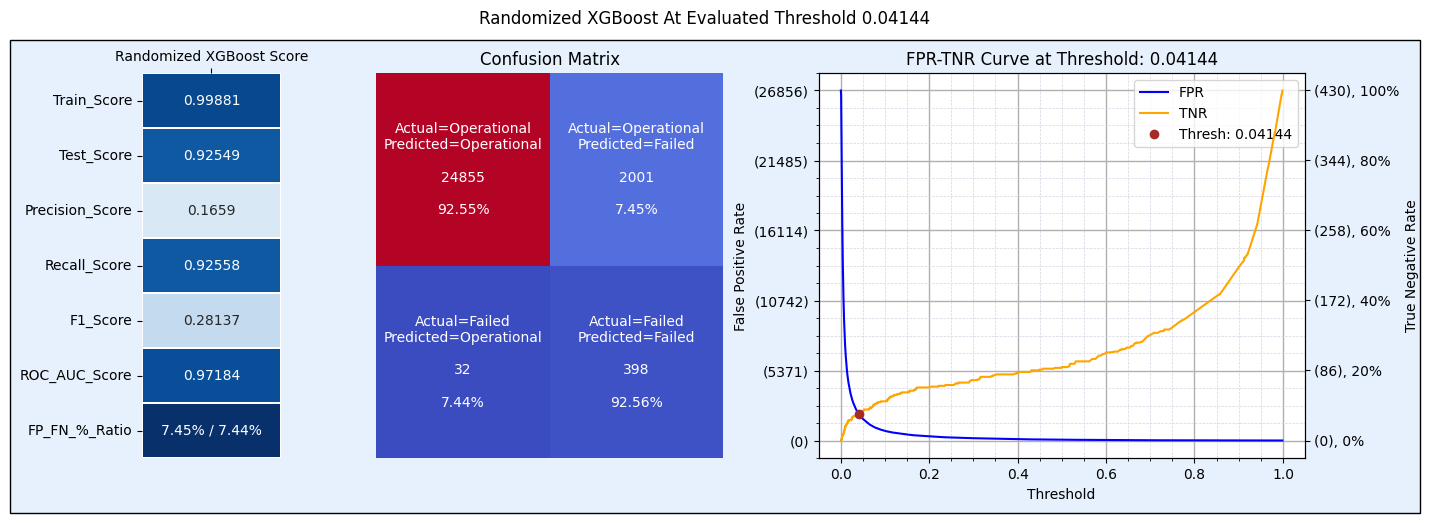

In [69]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold

* XGBoost Classifier at base threshold (at 0.5) optimized by Randomized SearchCV performs well in predicting True Negatives.

  * In predicting True Negatives the model's performance is good but requires more improvement.

Insights at evaluated threshold

* XGBoost Classifier at evaluated threshold, the model's performance is improved in predicting True Negatives.
But in the meanwhile the True Negative values are increased.



---



XGBoost Hyperparameter tuned using Optuna

Optuna, when used with XGBoost, provides automated hyperparameter optimization, leveraging XGBoost's capabilities to build more accurate and efficient models. Key features include:

* Dynamic search spaces to define search spaces for hyperparameters using familiar python syntax.

* Efficient sampling and pruning to speed up the optimization process by quickly identifying the best performing hyperparameters and discarding the less effective ones early on.



In [70]:
# Define an objective function to be minimized
def objective(trial):
  # Define Hyperparameter to tune
  xg_params={'max_depth':trial.suggest_int('max_depth',4,21),
             'learning_rate':trial.suggest_float('learning_rate',0.001, 0.15, log=True),
             'colsample_bytree':trial.suggest_float('colsample_bytree',0.1,0.4),
             'subsample':trial.suggest_float('subsample',0.8,1.0),
             'n_estimators':trial.suggest_int('n_estimators',200,500),
             'min_child_weight':trial.suggest_int('min_child_weight',1,10),
             'reg_alpha':trial.suggest_float('reg_alpha',0.001,0.5),
             'reg_lambda':trial.suggest_float('reg_lambda',0.0001,1.0),
             'gamma':trial.suggest_float('gamma',0.00001,0.1),
             'booster':'gbtree',
             'objective':'binary:logistic',
             'tree_method':'hist',
             'scale_pos_weight':trial.suggest_int('scale_pos_weight',21,251)}

  # Create a XGBoost Model with suggested parameters
  model_xg=XGBClassifier(**xg_params, n_jobs=-1)
  cv=StratifiedKFold(n_splits=7)
  accuracy_op=cross_val_score(model_xg, x_train,y_train, scoring='roc_auc', cv=7).mean()
  return accuracy_op

# Create an Optuna Study
study=optuna.create_study(direction='maximize')

# Optimize Study
study.optimize(objective, n_trials=11)
best_xgb=study.best_params

# Print Best Parameters
print(best_xgb)


xg_op=XGBClassifier(**best_xgb)
xg_op.fit(x_train, y_train)
class_list.append(xg_op)
title_list.append('Optuna XGBoost')

[I 2025-09-29 09:00:39,455] A new study created in memory with name: no-name-ef6babb1-dd60-478d-8499-f3eb06c22f5e
[I 2025-09-29 09:01:07,890] Trial 0 finished with value: 0.9622226504114932 and parameters: {'max_depth': 15, 'learning_rate': 0.13951337021530316, 'colsample_bytree': 0.30146507670504, 'subsample': 0.9831886967170821, 'n_estimators': 207, 'min_child_weight': 9, 'reg_alpha': 0.3830919313519947, 'reg_lambda': 0.5155896316703557, 'gamma': 0.03702935484422251, 'scale_pos_weight': 206}. Best is trial 0 with value: 0.9622226504114932.
[I 2025-09-29 09:01:52,602] Trial 1 finished with value: 0.9650055026315991 and parameters: {'max_depth': 19, 'learning_rate': 0.005583167400651717, 'colsample_bytree': 0.3617450351296394, 'subsample': 0.970704320368363, 'n_estimators': 216, 'min_child_weight': 9, 'reg_alpha': 0.1459370735020036, 'reg_lambda': 0.5167212524154831, 'gamma': 0.09020574313337223, 'scale_pos_weight': 155}. Best is trial 1 with value: 0.9650055026315991.
[I 2025-09-29 09

{'max_depth': 14, 'learning_rate': 0.009699094384585221, 'colsample_bytree': 0.37581042767929285, 'subsample': 0.9935849681288542, 'n_estimators': 402, 'min_child_weight': 9, 'reg_alpha': 0.09629364088018762, 'reg_lambda': 0.6916905104497261, 'gamma': 0.05787409078933102, 'scale_pos_weight': 137}


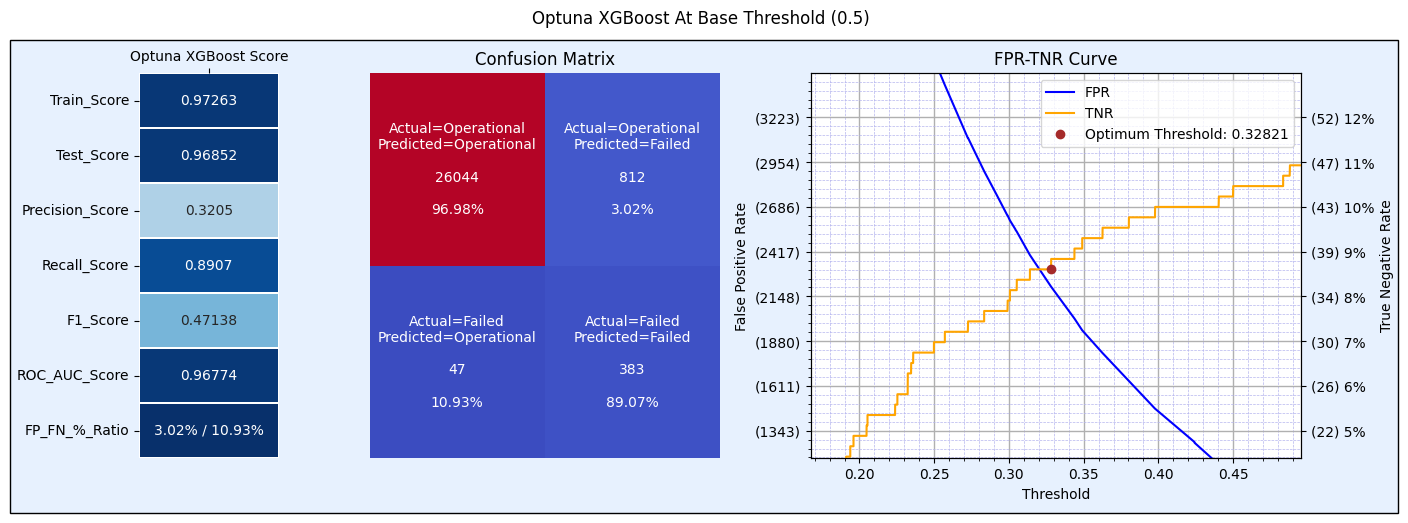

In [71]:
base_scores(class_list[-1], title_list[-1])

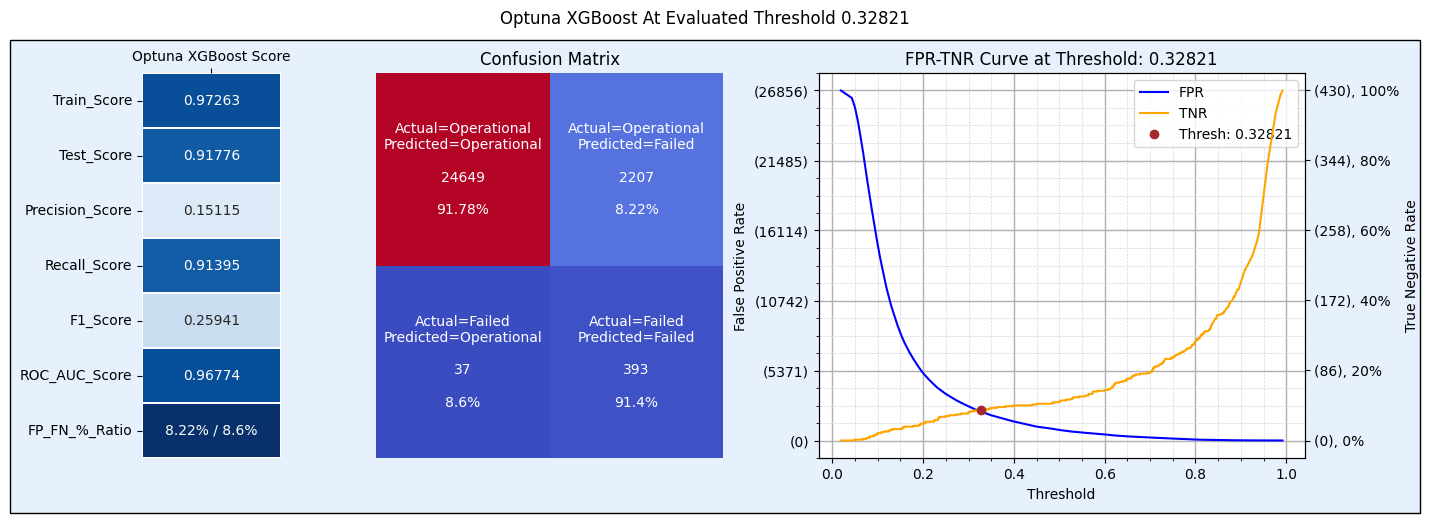

In [72]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at Base threshold
* XGBoost Classifier with its best parameters (optimized by Optuna) at base threshold (0.5) looks good at predicting True Negatives.
Additionally, if we consider True Positives, the model's performance is moderate.

Insights at evaluated threshold
* At the evaluated threshold, we see that our model's performance is Boosted in predicting True Positives with a comparatively small portion increase in False Positives.


### XGBoost Hyperparameter tuned using Hyperopt

HyperOpt is important in optimizing XGBoost because it provides an efficient and effective method for hyperparameter tuning.

In essence, Hyperopt streamlines the hyperparameter tuning process for XGBoost, allowing users to achieve better model performance with less computational effort and time.

Key features of using Hyperopt in XGBoost include:

* Efficiency: Finds better hyperparameter combinations with fewer evaluations.

*  Avoiding Local Minima: In the parabolastic model, it does not get stuck in local minima during optimizing process.


In [73]:
# Define parameter space for optimization
space_boost={'max_depth':hp.randint('max_depth', 2,11),
             'learning_rate':hp.uniform('learning_rate', 0.001,0.15),
             'colsample_bytree':hp.uniform('colsample_bytree', 0.1,0.4),
             'min_child_weight':hp.randint('min_child_weight',1,11),
             'reg_alpha':hp.uniform('reg_alpha', 1,21),
             'reg_lambda':hp.uniform('reg_lambda',1,21),
             'n_estimators':hp.randint('n_estimators',81,1100),
             'subsample':hp.uniform('subsample',0.5,1),
             'gamma':hp.uniform('gamma',0.00001, 0.1),
             'booster':'gbtree',
             'objective':'binary:logistic',
             'tree_method':'hist',
             'scale_pos_weight':hp.randint('scale_pos_weight', 21,501)}

# Define objective function to be optimized
def hyper_xg(params_xg):
  params_xg={'max_depth':params_xg['max_depth'],
             'learning_rate':params_xg['learning_rate'],
             'colsample_bytree':params_xg['colsample_bytree'],
             'min_child_weight':params_xg['min_child_weight'],
             'reg_alpha':params_xg['reg_alpha'],
             'reg_lambda':params_xg['reg_lambda'],
             'n_estimators':params_xg['n_estimators'],
             'subsample':params_xg['subsample'],
             'gamma':params_xg['gamma'],
             'booster':params_xg['booster'],
             'objective':params_xg['objective'],
             'tree_method':params_xg['tree_method'],
             'scale_pos_weight':params_xg['scale_pos_weight']}

  # Utelize cross validation to estimate performance
  xgboost_bo=XGBClassifier(**params_xg, random_state=21)
  best_xgscore=cross_val_score(xgboost_bo, x_train, y_train, scoring='roc_auc', error_score='raise').mean()

  return 1-best_xgscore

# Minimize error
xg_hp_best_param=fmin(fn=hyper_xg, space=space_boost, algo=tpe.suggest, max_evals=11)

# Create XGBoost classifier with optimized parameters
xgboost_hyperopt=XGBClassifier(**xg_hp_best_param, random_state=21)
xgboost_hyperopt.fit(x_train, y_train)

class_list.append(xgboost_hyperopt)
title_list.append('XGBoost_HP')

100%|██████████| 11/11 [04:29<00:00, 24.54s/trial, best loss: 0.035423275620994454]


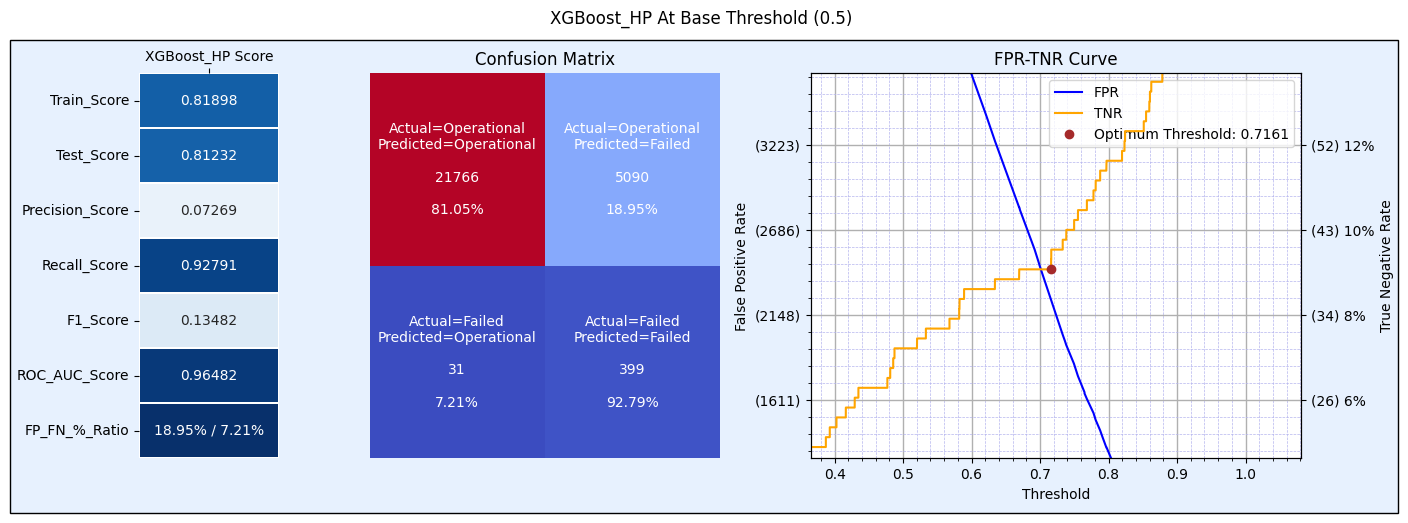

In [74]:
base_scores(class_list[-1], title_list[-1])

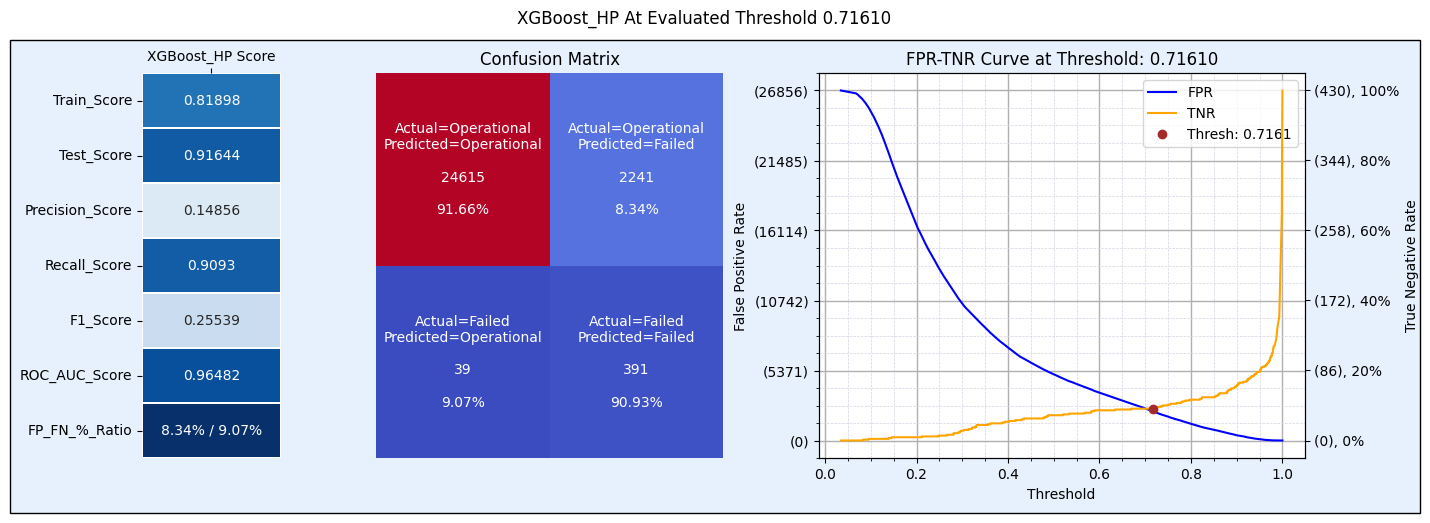

In [75]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold
* XGBoost Classifier optimized by Hyperopt at base threshold performs well in detecting True Positives correctly.
  * The balance between False Negatives and False Positives is also maintained.

Insights at evaluated threshold
* On further optimizing the threshold, the performance of the model in predicting True Positive is improved.

  * Slight increase in False Positives can be ignored.


### **Stacking Classifier**

Stacking classifier is an ensemble technique in machine learning that aims to improve predictive performance by combining the predictions of multiple base models through a meta model.

Key importance includes:

* Reduce Overfitting

* Learning from Mistake

* Flexibility and customization

* Leveraging Heterogeneous models

In [76]:
base_model=list(zip(title_list[1:], class_list[1:]))

meta_model=LogisticRegression()
stack_clsf=StackingClassifier(estimators=base_model, final_estimator=meta_model)

stack_clsf.fit(x_train, y_train)
class_list.append(stack_clsf)
title_list.append('Stack_Classifier')

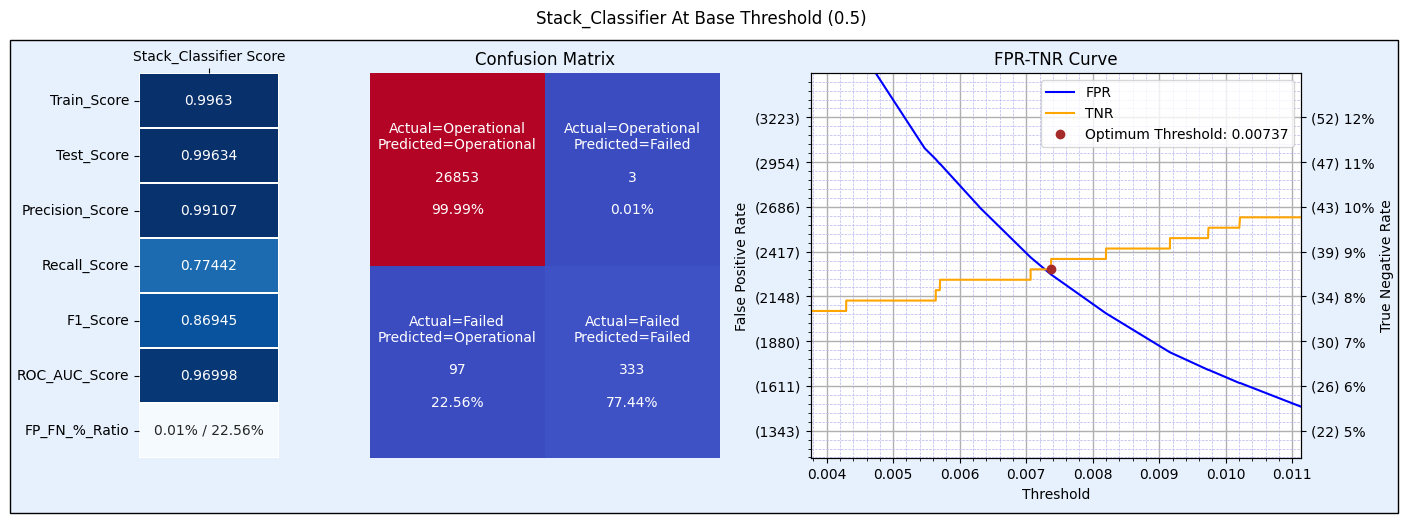

In [77]:
base_scores(class_list[-1],title_list[-1])

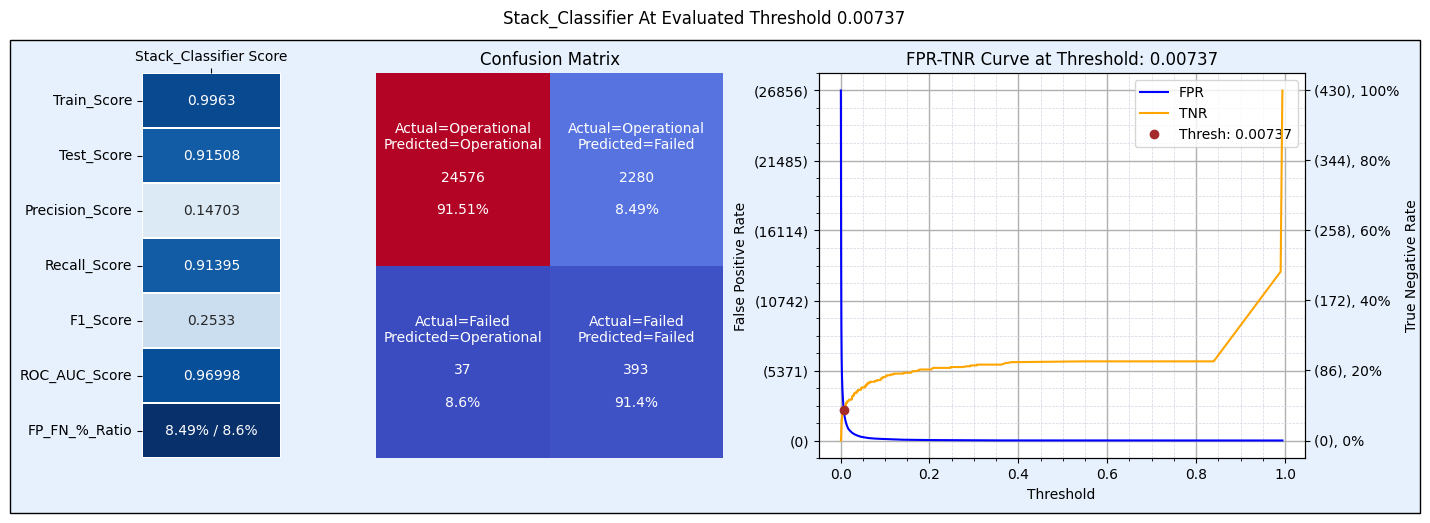

In [78]:
evaluated_result(class_list[-1], title_list[-1], thresh_store[-1][-2])

Insights at base threshold
* Stacking Classifier at base threshold, on stacking the output of all models performs well in predicting True Negatives with descent ROC-AUC score.
But in predicting True negatives the performance is not so good.

Insights at evaluated threshold
* On adjusting the threshold to optimal value, the model's performance is improved in predicting True Negatives with balanced value of False Positives.



---



##***7. Model's Performance Comparison side-by-side***

#### Model's Scores

In [79]:
clasf_all=[item for pair in zip(clasf_store, evclasf_store, range(len(clasf_store))) for item in pair]

In [80]:
result=[]
string1=''
string2=''


for i,j in enumerate(clasf_all):
  if i in range(0,len(clasf_all),2):
    string1 += (f'.col{i}, ')
    string2 += (f'.col{i+1}, ')


  if i%3==0:
    # Store evaluation scores of different models at base threshold

    cm_base=confusion_matrix(y_test, j[:][0].predict(x_test))
    result.append([j[:][0].score(x_train, y_train), accuracy_score(y_test, j[:][0].predict(x_test)), precision_score(y_test, j[:][0].predict(x_test)), recall_score(y_test, j[:][0].predict(x_test)),f1_score(y_test, j[:][0].predict(x_test)), roc_auc_score(y_test, j[:][0].predict_proba(x_test)[:,1]), f"{round((cm_base[0,1]/cm_base[0].sum()*100),2)}% / {round((cm_base[1,0]/cm_base[1].sum()*100),2)}%"])

  elif i in range(1, len(clasf_all), 3):  # Store evaluation scores of different models at evaluated threshold
    pred_result=(j[:][0].predict_proba(x_test)[:,1]>=j[:][-1]).astype(int)
    cm_ev=confusion_matrix(y_test, pred_result)
    result.append([j[:][0].score(x_train, y_train), accuracy_score(y_test, pred_result), precision_score(y_test, pred_result), recall_score(y_test, pred_result), f1_score(y_test, pred_result), roc_auc_score(y_test, j[:][0].predict_proba(x_test)[:,1]), f"{round((cm_ev[0,1]/cm_ev[0].sum()*100),2)}% / {round((cm_ev[1,0]/cm_ev[1].sum()*100),2)}%"])

# Define a list of tuples representing hierarchical column structure
cidx_1=[[(f'{item[1]}', 'Base_Th'), (f'{item[1]}', f"Thresh ({format(item[2],'.5f')})")] for item in evclasf_store]
cidx_2=[column for subcolumn in cidx_1 for column in subcolumn]

cidx=pd.MultiIndex.from_tuples(cidx_2) # Create a Multiindex from list of tuples
result_df=pd.DataFrame(result, cidx, columns=score_column) .T  # Create a transposed DataFrame with the MultiIndex columns
result_df.columns=cidx  # Assign Column names to DataFrame

# Decorate the scores DataFrame for Clear Comparison
subset_=[colmn[0] for colmn in (result_df.columns.tolist()[0:len(result_df.columns):4])]                                                      # Select columns to color 'yellow'
header=     {'selector':'th', 'props': [('background-color','#000077'), ('color','white'), ('text-align','center'), ('font-weight','bold')]}  # Set style of Column top header
header_lv10={'selector':'th.col_heading.level1', 'props':[('background-color', '#5b9bd5')]}                                                   # Set style of column Sub-header
index_col=  {'selector':'th.row_heading.level0', 'props':[('background-color','#5f008b'), ('color', 'white')]}                                # Set style of Row Index
border2=    {'selector':'.row0', 'props':[('border-top', '2px solid #5f008b')]}                                                               # Create thin border between column names and values
verticle_border={'selector':string1, 'props':[('border-left', '5px solid  #a9b8ba')]}  # Create thick vertical borders to seperate different Model's scores
sub_border={'selector':string2, 'props':[('border-left', '2px dashed #a9b9ba')]}  # Create thin vertical border to separate base-threshold scores from evaluated threshold scores

models_scores=result_df.style.set_table_styles([header, header_lv10, border2, verticle_border, index_col, sub_border]).set_properties(subset=subset_, **{'background-color':'yellow'}).highlight_max(color='orange', axis=1)
models_scores

In [81]:
models_scores.to_excel('/content/drive/MyDrive/GDFiles/Folder1/Models_scores2.xlsx', engine='openpyxl')

#####Model Insights


* To access the performance of different models, I conducted a comprehensive evaluation using various metrics. Here are key findings:

* LightGBM optimized by optuna and LightGBM optimized by Hyperopt at base threshold has achieved the highest accuracy of 99.64% and also highest Precision score about 99.4% but Roc-Auc score is not so good.

* XGBoost Optimized by Randomized search CV at the evaluated threshold has achieved the high Recall and best ROC-AUC scores.

* CatBoost classifier  at base threshold demonstrates overall impressive performance with balanced scores with all optimizers (Randimized search, Optuna, and Hyperopt) and also at evaluated threshold performance becomes more clean.

* AdaBoost classifier performs well at base threshold but ROC-AUC score is lowest among all models.

* Performance of Logistic Regression is average among all evaluation metrices.

* XGBoost Classifier's overall performance with all hyperparameter optimizers is decent at the base threshold as well as at evaluated threshold.


### Confusion Matrices

Comparing the Confusion Matrix of different classification model side by side with pair of base threshold confusion matrix and evaluated threshold confusion matrix can provide valuable insights into their performances.

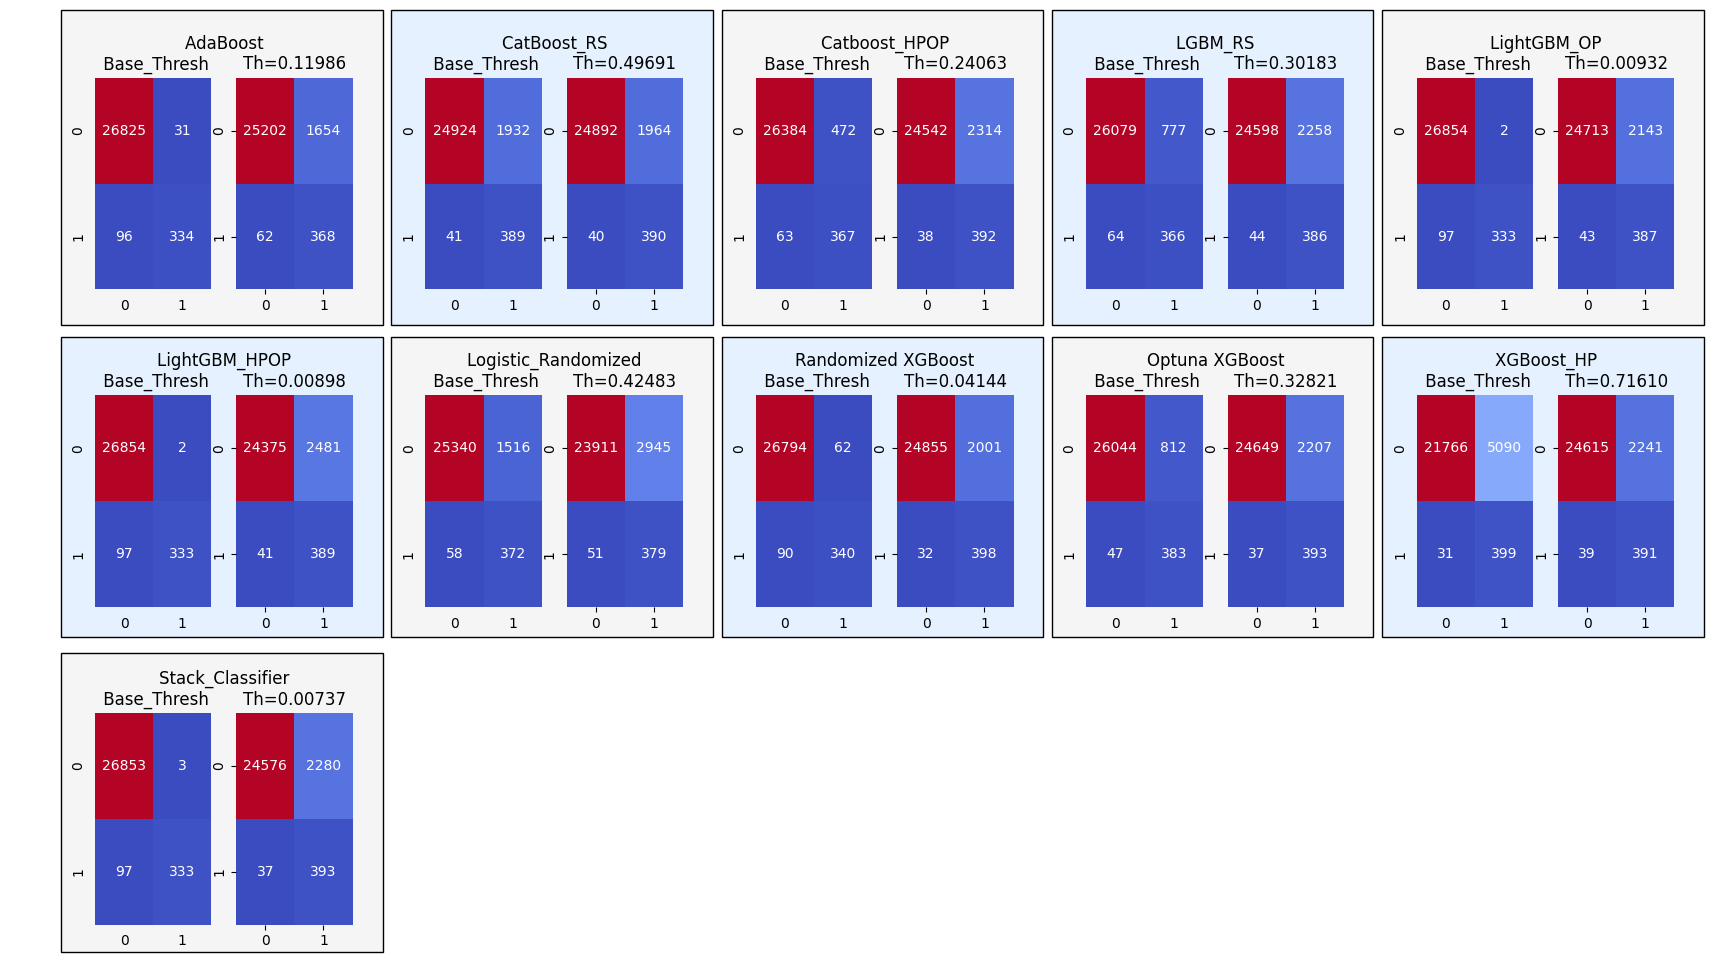

In [112]:
# Create space to plot confusion matrices
fig, ax=plt.subplots(3,15,figsize=(21,11), width_ratios=[5,5,1]*5, gridspec_kw={'wspace':0.29, 'hspace':0.5})
axes=ax.flatten()

b1,b2,b5=0.109, 0.109, 0.109
e1, e2, e5=0.1572, 0.1572, 0.1572

color_list=['#e5f1ff', '#f5f5f5']# Color list for Boxes facecolor
for i,j in enumerate(clasf_all):

  if i in range(0,len(clasf_all),3):
    sns.heatmap(confusion_matrix(y_test, j[0].predict(x_test)), annot=True, cmap='coolwarm', fmt='.5g', ax=axes[i], cbar=False) # Plot Confusion matrices of different models at base threshold
    if i< (ax.shape)[1]:                                                                                                        # Create Box that contain a pair of confusion matrices of same model for first row
      fig.patches.append(plt.Rectangle((b1, 0.6551), 0.1532, 0.2865, facecolor= color_list[1] if i%2==0 else color_list[0], transform=fig.transSubfigure, zorder=-1, edgecolor='k'))
      b1+=e1
    elif i< 2*(ax.shape)[1]:                                                                                                    # Create box to wrap a pair of confusion matrix of same model for second row
      fig.patches.append(plt.Rectangle((b2, 0.3718), 0.1532, 0.2721, facecolor= color_list[1] if i%2==0 else color_list[0], transform=fig.transFigure, zorder=-1, edgecolor='k'))
      b2+=e2

    else:
      fig.patches.append(plt.Rectangle((b5, 0.08521), 0.1532, 0.2721, facecolor=color_list[1] if i%2==0 else color_list[0], transform=fig.transFigure, zorder=-1, edgecolor='k' ))

    axes[i].tick_params(bottom=False, left=False)
    axes[i].set_title(f"                            {j[:][-1]} \n Base_Thresh")


  elif i in range(1,len(clasf_all),3):
    predict_result1=(j[:][0].predict_proba(x_test)[:,1]>=j[:][-1]).astype(int)
    sns.heatmap(confusion_matrix(y_test, predict_result1), annot=True, cmap='coolwarm', fmt='.5g', ax=axes[i], cbar=False) # Create confusion matrices of different model at evaluated threshold
    axes[i].set_title(f"Th={(j[:][-1]):.5f}")

  elif i in range(2,len(clasf_all),3):  # Create an empty space between confusion matrices of different model
    pass
    axes[i].plot()
    axes[i].set_frame_on(False)
    axes[i].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

for p in range(len(axes)): # Remove extra frames of subplots
  if p>= len(clasf_all):
    axes[p].set_axis_off()
fig.savefig('/content/drive/MyDrive/GDFiles/Folder1/Confusion_matrices.png')
plt.show()

From the comparison chart of different model's confusion matrices, it seems that XGBoost Classifier optimized by Randomized Search CV has overall best performance as False Negatives are minimum with very low False Positives. So, Confusion matrices comparison chart indicates it as an optimal model.

### ROC-AUC Curve & Precision-Recall Curve

In [83]:
def curve(clf_1,i):
  plt.subplot(1,2,1)
  plt.plot(roc_curve(y_test, clf_1.predict_proba(x_test)[:,1])[0], roc_curve(y_test, clf_1.predict_proba(x_test)[:,1])[1], label=(f'{i}: { str(round(roc_auc_score(y_test, clf_1.predict_proba(x_test)[:,1]),5))}')),
  plt.plot(range(0,2), range(0,2), 'b-.')
  plt.legend(loc='best')
  ax=plt.gca()
  ax.set(xlabel='True Positive Rate', ylabel='False Negative Rate', title='ROC-AUC_Curve')
  ax.set_facecolor('#e5e5ff')

  plt.subplot(1,2,2)
  precision_curve, recall_curve, _=precision_recall_curve(y_test, clf_1.predict_proba(x_test)[:,1])
  plt.plot(precision_recall_curve(y_test, clf_1.predict_proba(x_test)[:,1])[0], precision_recall_curve(y_test, clf_1.predict_proba(x_test)[:,1])[1], label= (f"{i}: { str(round(auc(recall_curve, precision_curve),5))} ") )
  plt.plot(range(1,-1,-1), range(0,2), 'b-.')
  plt.legend(loc='best')
  ax1=plt.gca()
  ax1.set(xlabel='Precision', ylabel='Recall', title='Precision-Recall Curve')
  ax1.set_facecolor('#e5e5ff')

fig=plt.figure(figsize=(15,5))
for num, item in enumerate(class_list):
  curve(item, title_list[num])
fig.savefig('/content/drive/MyDrive/GDFiles/Folder1/Curves_plot2.png')


### Most important Evaluation Metrics for Positive Business Impact

In this project, our aim is to predict machine failure, which is a very rare incidence, and also a very significant issue in the industrial sector, as it can lead to production disruption, increased maintenance, safety concerns, and various other problems. So, here the cost of failing to predict machine failure is very high, which means we have to minimize False Negatives as much as possible.
The dataset we have for this project is highly imbalanced, as it has very few instances of machine failure, so accuracy will not be reliable metrics and also precision score will try to minimize False Positives. F1 Score tries to balance precision and recall, but the balance will also not provide an appropriate score.

So, to minimize False Negatives, Recall Score must be maximized; therefore here Recall score and ROC-AUC score become very important metrics.

### Selected Model for Final Prediction

### Final Prediction

In [95]:
pred_data=pd.get_dummies(ta_test, columns=['Type'], dtype='int64')
pred_data[continuous_columns]=StandardScaler().fit_transform(pred_data[continuous_columns])
pred_data=pred_data.drop(['id', 'Product_ID', 'Type_M'], axis=1)
print(pred_data.shape)
print(x_train.shape)

(90954, 12)
(109143, 12)


In [114]:
xg.fit(x,y)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.3439101011693676), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=np.float64(0.05212057922232008), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.07418861424744003), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=41, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimaters=1000, n_estimators=None,
              n_jobs=None, ...)

In [100]:
predicted_probabilities=xg.predict_proba(pred_data)[:,1]
pred_result=(predicted_probabilities>=thresh_store[7][-2]).astype('int64')

In [101]:
result=ta_test.copy()
final_prediction=result.drop(result.columns.difference(['id']), axis=1)
final_prediction['Machine_failure']=pred_result
final_prediction

id  Machine_failure
0      136429                0
1      136430                0
2      136431                0
3      136432                0
4      136433                0
...       ...              ...
90949  227378                0
90950  227379                0
90951  227380                0
90952  227381                0
90953  227382                0

[90954 rows x 2 columns]

In [102]:
final_prediction.to_csv('/content/drive/MyDrive/GDFiles/Folder1/Tata_Prediction')

#####Conclusion

In this Project we embarked on a journey to predict the machine status of an industry, whether it will operate or fail, based on different sensor readings. Since our aim is to predict Machine failure, which is very sensitive, so minimizing False Negatives becomes very crucial. Here, the Recall score and ROC-AUC score become very important metrics for us.

The steps involved in this Journey include-

**Data Loading:** Imported the Train and Test Datasets in CSV format from the drive and conducted initial exploratory data analysis.

**Data Cleaning:** The dataset we have for this project is almost clean as there is no missing values, data types are accurate, we just requre to clean the feature names by replacing whitespace and square brackets with under_score.

**Feature Engineering:** Transformed Categorical variable (Type) to numerical format to enable their use in machine learning models.

**Data Scaling:** Numerical features were standardized to make sure that all feature values contribute equally to the models.


**Data Splitting:** Divided the train dataset into training and testing sets for model performance evaluation. The percentage of training and testing set is 80% and 20% respectively.

**Model Selection:** The dataset we have for this project is highly imbalanced, so it becomes very important to opt for the right model that can squeeze out the maximum possible information from the training set. Models I have used are:
* AdaBoost Classifier
* CatBoost Classifier
* LightGBM
* Logistic Regression
* XGBoost Classifier
* Stacked Classifier of above models

**Hyperparameter Tuning:** To improve the performance of the models, it is very necessary to Optimize the model's Hyperparameter. For Hyperparameter optimization I have Used:
* Randomized SearchCV (with CatBoost, LightGBM, Logistic Regression and XGBoost)
* HyperOpt (with CatBoost, LightGBM and XGBoost)
* Optuna (with LightGBM, and XGBoost)


**Training:** Trained the models with training data at optimal parameters.

Model Evaluation at Base Threshold: At the base threshold, since the dataset is highly imbalanced towards Machine running, so False Negatives are very high even on optimizing class weights. According to the project's requirement, we must minimize False Negatives.

**Threshold Optimization:** To minimize False Negatives, I have adjusted the threshold to optimum value so that there can be balanced False Negatives and False Positives. To optimize the threshold, I have plotted True Negative Rate and False Positive Rate and pointed the minimum difference between them as Optimum Threshold.

Model Evaluation at Evaluated Threshold: At the evaluated threshold, the performance of all models is improved in predicting True Negatives correctly; meanwhile, False Positive values are also increased, but the cost of False Positives is not so severe.

Concluding model evaluation, insights that we have:
LightGBM optimized with Optuna and HyperOpt has achieved the highest accuracy, highest Precision score, and highest F1 score.
XGBoost optimized by Randomized search CV at the Evaluated threshold exhibits exceptional Recall and ROC-AUC scores.

Model Selection: As per the project requirement, our aim is to minimize False Negatives (Type II Error) with the proper value of False Positives. This can be achieved at maximum Recall and ROC-AUC score. On comparing the scores of all the models at base and evaluated threshold, I concluded that XGBoost Classifier optimized by Randomizedsearch CV is the most suitable model for this Project, as it provides a descent overall score with the highest Recall and ROC-AUC score.

Model Evaluation: To access the performances of different models, I conducted a comprehensive evaluation using various metrics. Here are key findings:
LightGBM Optimized with Optuna and Hyperopt has the highest accuracy, precision and F1 scores, but Recall and ROC-AUC scores are not so good.
XGBoost optimized by Randomized search at evaluated threshold exhibited exceptional Recall and ROC-AUC score.

The dataset for this project is highly imbalanced as machine failures are very rare occurrences compared to normal operation. This imbalance causes low recall rates although the accuracy is very high.


The aim of this project is to predict machine failure, so it is very crucial for the model to predict failed instances correctly as the cost of failing to do so is very high, which is done by minimizing False Positives. So for this dataset, Recall score and ROC-AUC score become very important.

From Models performance comparison, we have seen that XGBoost optimized by Randomized Search CV has best Recall score and ROC-AUC score, I opted this model as final Predictor.

Made Prediction on Provided Test dataset and the predicted dataset link is-

Instructions for the Stakeholders: Stakeholders can use this project to know the reasons of machine failure from EDA Conclusion and can use these informations to reduce potential machine failure.




